# Bayesian Learning Binary and Multiclass

# 0. Import Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Ignore runtime Warnings: expected due to floating point overflow

In [3]:
import warnings
warnings.filterwarnings("ignore")

# 1. Data I/O

In [16]:
data=pd.read_csv('diabetes.csv',delimiter=',')#,header=-1

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [64]:
#data.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [65]:
#data.head()

# 2. Data Exploration

In [6]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
data['Outcome']=data['Outcome'].map({1:'Has Diabetes',0:'No Diabetes'})

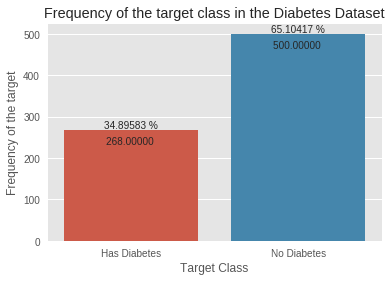

In [15]:
import matplotlib.style as style
style.use('ggplot')
ax=sns.countplot(x='Outcome', data=data);
total=float(len(data))
plt.title('Frequency of the target class in the Diabetes Dataset')
plt.ylabel('Frequency of the target')
plt.xlabel('Target Class')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.5f} %'.format(height*100/total),ha="center")
    ax.text(p.get_x()+p.get_width()/2.,height - 35,'{:1.5f} '.format(height),ha="center") 

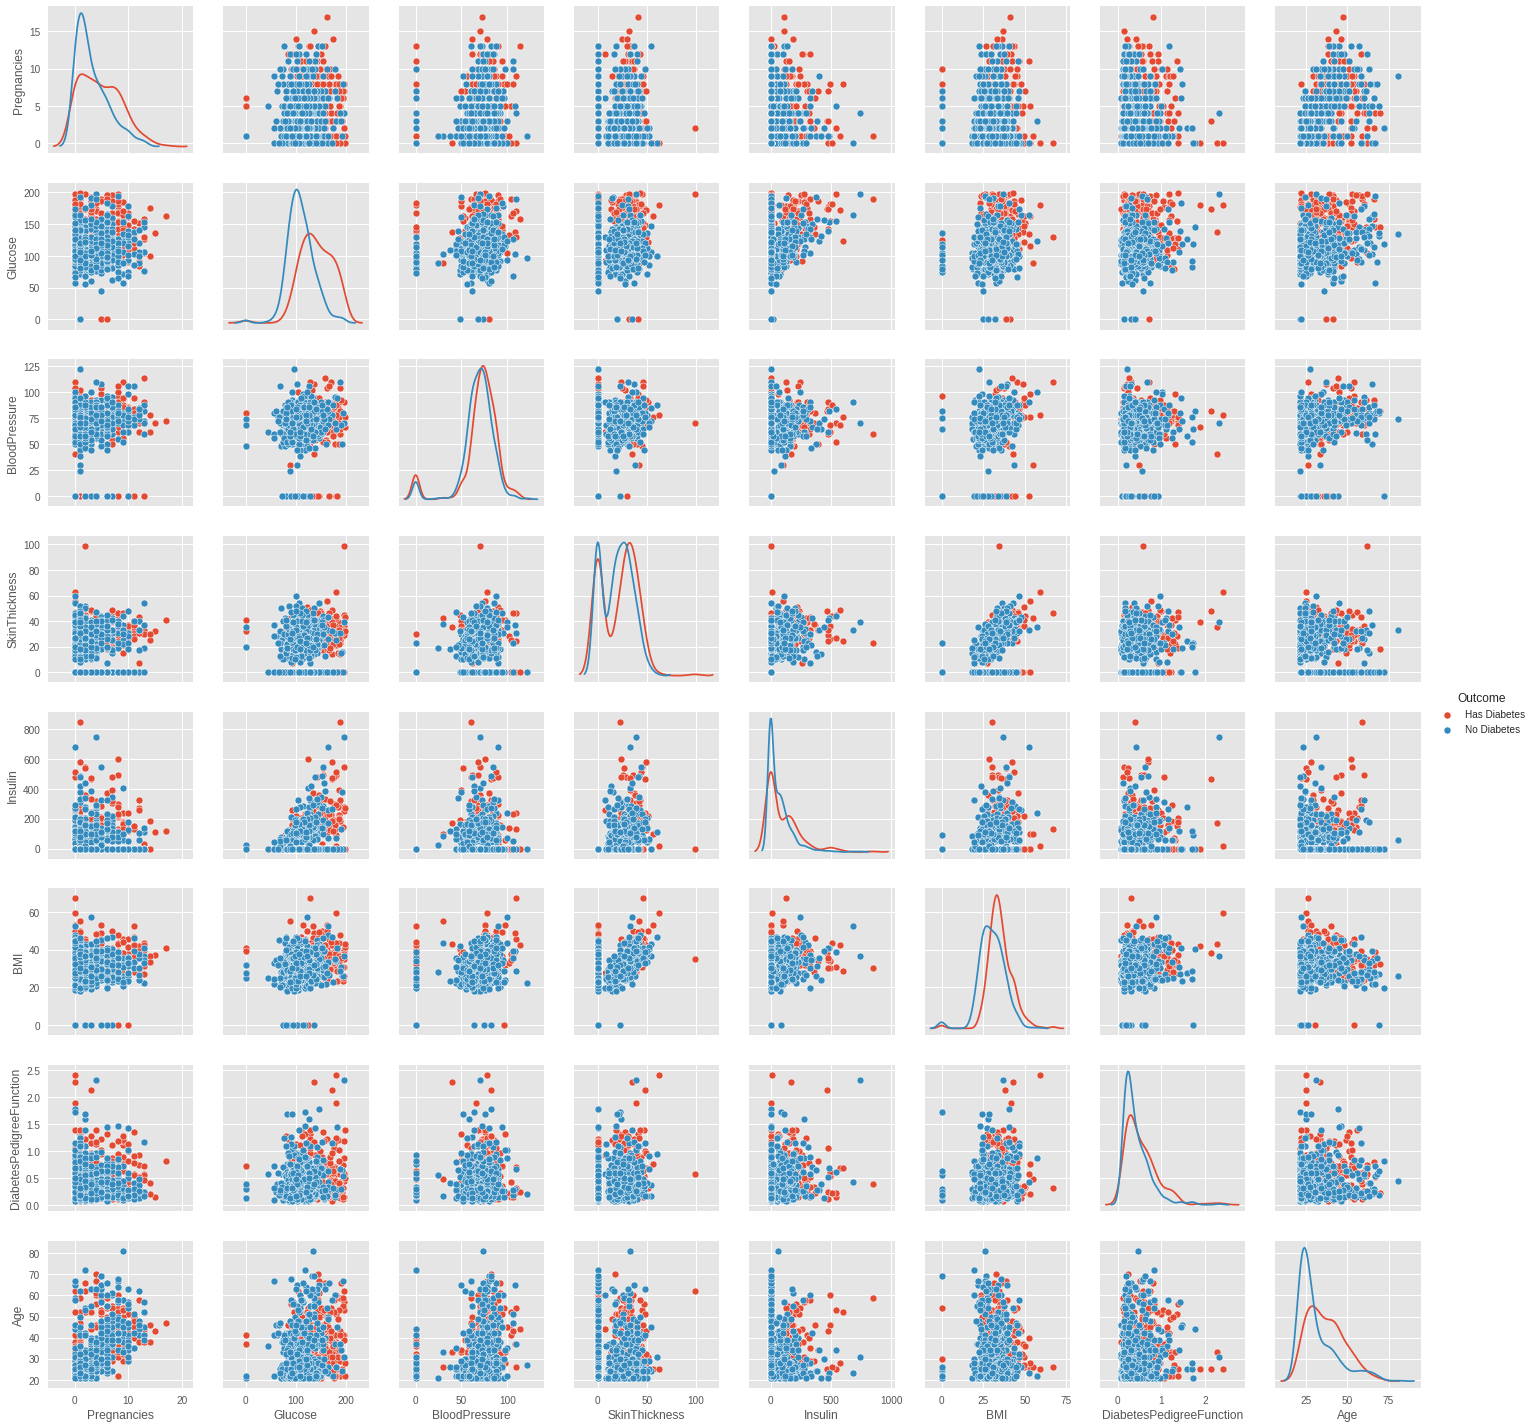

In [71]:
sns.pairplot(data, hue="Outcome",diag_kind="kde")

# Shallow Neural network without Bayesian

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [73]:
X=data.drop(['Outcome'],axis=1)
Y=data[['Outcome']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y.Outcome)

In [74]:
Y_train_1hot=pd.get_dummies(Y_train,columns=['Outcome'])
Y_train_1hot=Y_train_1hot.astype('float')
Y_test_1hot=pd.get_dummies(Y_test,columns=['Outcome'])
Y_test_1hot=Y_test_1hot.astype('float')

In [75]:
from sklearn.preprocessing import StandardScaler
xcols=X_train.columns.tolist()
X_train=StandardScaler().fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=xcols)

In [76]:
xcols=X_test.columns.tolist()
X_test=StandardScaler().fit_transform(X_test)
X_test=pd.DataFrame(X_test,columns=xcols)

In [77]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.829844,-1.235253,-0.089432,-1.299189,-0.671327,-1.712243,0.492470,-0.517911
1,1.238989,1.468423,1.946297,1.547758,1.309554,0.673676,-0.918723,0.846519
2,-0.829844,-0.430588,-0.518006,1.547758,0.855066,0.415407,-0.150099,-0.773742
3,-1.125391,0.213145,-0.089432,-0.123276,0.872217,-0.199521,2.850606,-0.688465
4,-0.829844,-0.688081,0.231999,-0.556507,-0.276866,-1.552362,-0.967915,-0.432634


In [78]:
Y_train['Outcome']=Y_train['Outcome'].map({'Has Diabetes':1.0,'No Diabetes':0.0})
Y_test['Outcome']=Y_test['Outcome'].map({'Has Diabetes':1.0,'No Diabetes':0.0})

In [79]:
import keras

In [80]:
#import numpy as np
#import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

#import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.optimizers import SGD,Adam
import keras.backend as K
import keras.callbacks
from keras import regularizers

In [81]:
nb_classes=2
l1_num_neuron=70
#l2_num_neuron=20
output_neuron=nb_classes

In [82]:
layer_1 = Dense(l1_num_neuron, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_dim=X_train.shape[1])
#layer_2 = Dense(l2_num_neuron, activation='relu',kernel_regularizer=regularizers.l2(0.01))
layer_out = Dense(output_neuron, activation='softmax',kernel_regularizer=regularizers.l2(0.01))

In [83]:
mlp=Sequential()
mlp.add(layer_1)
mlp.add(Dropout(0.3))
#mlp.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.01))
#mlp.add(layer_2)
#mlp.add(Dropout(0.3))
#mlp.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.01))
mlp.add(layer_out)

In [84]:
#optim=Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0005)
#sgd = SGD(lr=0.01, momentum=0.8, decay=0.1/200, nesterov=True)
mlp.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [85]:
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 70)                630       
_________________________________________________________________
dropout_4 (Dropout)          (None, 70)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 142       
Total params: 772
Trainable params: 772
Non-trainable params: 0
_________________________________________________________________


In [86]:
from keras.callbacks import EarlyStopping
train_res = mlp.fit(X_train.values,
                      Y_train.values.ravel(),
                      batch_size=5,
                      epochs=70,
                      verbose=True,
                      validation_split=0.1,
                      callbacks=
                      [EarlyStopping(patience=4,mode='min',
                                     verbose=True)]
                      )

Train on 552 samples, validate on 62 samples
Epoch 1/70
552/552 [==============================] - 0s 109us/step - loss: 0.8111 - acc: 0.6250 - val_loss: 0.7500 - val_acc: 0.6774
Epoch 2/70
552/552 [==============================] - 0s 106us/step - loss: 0.6730 - acc: 0.7283 - val_loss: 0.6954 - val_acc: 0.7097
Epoch 3/70
552/552 [==============================] - 0s 107us/step - loss: 0.6327 - acc: 0.7518 - val_loss: 0.6680 - val_acc: 0.7258
Epoch 4/70
552/552 [==============================] - 0s 104us/step - loss: 0.5950 - acc: 0.7627 - val_loss: 0.6518 - val_acc: 0.7258
Epoch 5/70
552/552 [==============================] - 0s 107us/step - loss: 0.5689 - acc: 0.7717 - val_loss: 0.6378 - val_acc: 0.7419
Epoch 6/70
552/552 [==============================] - 0s 108us/step - loss: 0.5620 - acc: 0.7717 - val_loss: 0.6234 - val_acc: 0.7419
Epoch 7/70
552/552 [==============================] - 0s 106us/step - loss: 0.5507 - acc: 0.7899 - val_loss: 0.6106 - val_acc: 0.7581
Epoch 8/70
552/55

In [87]:
predictions=mlp.predict_classes(X_test.values,verbose=True)

154/154 [==============================] - 0s 11us/step


In [88]:
predictions

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1])

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.values.ravel(),predictions)

0.79220779220779225

In [104]:
from sklearn.metrics import recall_score
recall_score(predictions,Y_test.values)

0.76190476190476186

# Bayesian Shallow Network without Noise in the dataset

In [90]:
%matplotlib inline
import theano
floatX = theano.config.floatX
import pymc3 as pm
import theano.tensor as tt
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
sns.set_style('white')
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split

In [91]:
#data['Outcome']=data['Outcome'].map({'Has Diabetes':1.0,'No Diabetes':0.0})

In [92]:
from pymc3.theanof import set_tt_rng, MRG_RandomStreams
set_tt_rng(MRG_RandomStreams(42))

In [93]:
#trace = approx.sample(draws=5000)
#pm.traceplot(trace);

In [94]:
Y_test['Outcome'].value_counts()

0.0    100
1.0     54
Name: Outcome, dtype: int64

In [105]:
def construct_nn1(ann_input, ann_output):
    n_hidden_1 =70
    #n_hidden_2=20

    # Initialize random weights between each layer
    init_1 = np.random.randn(X_train.shape[1], n_hidden_1)
    #init_2 = np.random.randn(n_hidden_1, n_hidden_2)
    init_out = np.random.randn(n_hidden_1,Y_train.shape[1])

    with pm.Model() as neural_network1:
        # Weights from input to hidden layer
        weights_in_1 = pm.Normal('w_in_1', 0, sd=1,
                                 shape=(X_train.shape[1], n_hidden_1),
                                 testval=init_1)

        # Weights from 1st to 2nd layer
        #weights_1_2 = pm.Normal('w_1_2', 0, sd=1,
        #                        shape=(n_hidden_1, n_hidden_2),
        #                        testval=init_2)

        # Weights from hidden layer to output
        weights_2_out = pm.Normal('w_2_out', 0, sd=1,
                                  shape=(n_hidden_1,Y_train.shape[1]),
                                  testval=init_out)

        # Build neural-network using tanh activation function
        act_1 = pm.math.tanh(pm.math.dot(ann_input,
                                         weights_in_1))
        #act_2 = pm.math.tanh(pm.math.dot(act_1,
        #                                 weights_1_2))
        act_out = pm.math.sigmoid(pm.math.dot(act_1,
                                              weights_2_out))

        # Binary classification -> Bernoulli likelihood
        out = pm.Bernoulli('likelihood',
                           act_out,
                           observed=ann_output # IMPORTANT for minibatches
                          )
    return neural_network1

# Trick: Turn inputs and outputs into shared variables.
# It's still the same thing, but we can later change the values of the shared variable
# (to switch in the test-data later) and pymc3 will just use the new data.
# Kind-of like a pointer we can redirect.
# For more info, see: http://deeplearning.net/software/theano/library/compile/shared.html
ann_input = theano.shared(X_train.values)
ann_output = theano.shared(Y_train.values)
neural_network1 = construct_nn1(ann_input, ann_output)

In [106]:
with neural_network1:
    mean_field = pm.fit(method='advi', n=50000,callbacks=[pm.callbacks.CheckParametersConvergence(diff='relative')])

Average Loss = 492.45: 100%|██████████| 50000/50000 [02:24<00:00, 345.89it/s] 
Finished [100%]: Average Loss = 492.44


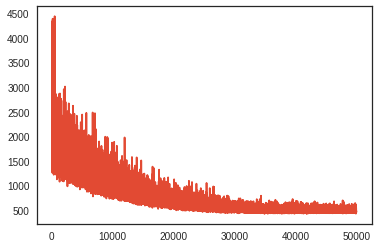

In [107]:
plt.plot(mean_field.hist);

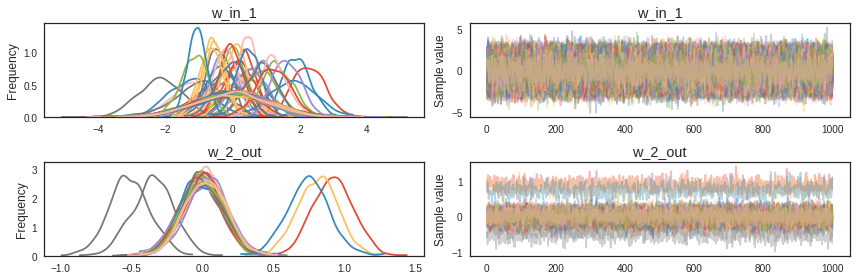

In [108]:
trace = mean_field.sample(draws=1000)
pm.traceplot(trace);

In [109]:
# Replace shared variables with testing set
ann_input.set_value(X_test.values)
ann_output.set_value(Y_test.values)

# Creater posterior predictive samples
ppc = pm.sample_ppc(trace, model=neural_network1, samples=1500)

# Use probability of > 0.5 to assume prediction of class 1
pred = ppc['likelihood'].mean(axis=0) > 0.5

100%|██████████| 1500/1500 [00:01<00:00, 1136.46it/s]


In [110]:
pred.shape

(154, 1)

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,Y_test.values)

0.74025974025974028

In [112]:
from sklearn.metrics import recall_score
recall_score(1*pred,Y_test.values)

0.609375

In [113]:
print('Accuracy = {}%'.format((Y_test.values == pred).mean() * 100))

Accuracy = 74.02597402597402%


# for credit_card dataset

In [114]:
data=pd.read_csv('creditcard.csv')

In [115]:
data.shape

(284807, 31)

In [116]:
data.drop(['Time'],inplace=True,axis=1)

In [117]:
X=data.drop('Class',axis=1)
Y=data[['Class']]

In [118]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y.Class)

In [119]:
X_train['Amount']=StandardScaler().fit_transform(X_train['Amount'].reshape(-1, 1))
X_test['Amount']=StandardScaler().fit_transform(X_test['Amount'].reshape(-1, 1))

In [130]:
nb_classes=2
l1_num_neuron=300
l2_num_neuron=200
output_neuron=nb_classes

In [141]:
layer_1 = Dense(l1_num_neuron, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_dim=X_train.shape[1])
layer_2 = Dense(l2_num_neuron, activation='relu',kernel_regularizer=regularizers.l2(0.01))
layer_out = Dense(output_neuron, activation='softmax',kernel_regularizer=regularizers.l2(0.01))

In [142]:
mlp=Sequential()
mlp.add(layer_1)
mlp.add(Dropout(0.3))
mlp.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.01))
mlp.add(layer_2)
mlp.add(Dropout(0.3))
mlp.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.01))
mlp.add(layer_out)

In [143]:
#optim=Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0005)
sgd = SGD(lr=0.01, momentum=0.8, decay=0.1/200, nesterov=True)
mlp.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [144]:
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 300)               9000      
_________________________________________________________________
dropout_7 (Dropout)          (None, 300)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_11 (Dense)             (None, 200)               60200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 200)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 402       
Total para

In [145]:
from keras.callbacks import EarlyStopping
train_res = mlp.fit(X_train.values,
                      Y_train.values.ravel(),
                      batch_size=100,
                      epochs=70,
                      verbose=True,
                      validation_split=0.1,
                      callbacks=
                      [EarlyStopping(patience=4,mode='min',
                                     verbose=True)]
                      )

Train on 205060 samples, validate on 22785 samples
Epoch 1/70
205060/205060 [==============================] - 15s 71us/step - loss: 0.8816 - acc: 0.9955 - val_loss: 0.1896 - val_acc: 0.9991
Epoch 2/70
205060/205060 [==============================] - 15s 71us/step - loss: 0.0947 - acc: 0.9992 - val_loss: 0.0463 - val_acc: 0.9989
Epoch 3/70
205060/205060 [==============================] - 15s 71us/step - loss: 0.0307 - acc: 0.9993 - val_loss: 0.0226 - val_acc: 0.9986
Epoch 4/70
205060/205060 [==============================] - 15s 71us/step - loss: 0.0173 - acc: 0.9993 - val_loss: 0.0155 - val_acc: 0.9987
Epoch 5/70
205060/205060 [==============================] - 15s 71us/step - loss: 0.0129 - acc: 0.9993 - val_loss: 0.0132 - val_acc: 0.9986
Epoch 6/70
205060/205060 [==============================] - 15s 72us/step - loss: 0.0112 - acc: 0.9993 - val_loss: 0.0120 - val_acc: 0.9986
Epoch 7/70
205060/205060 [==============================] - 15s 71us/step - loss: 0.0102 - acc: 0.9993 - val_

In [146]:
predictions=mlp.predict_classes(X_test.values,verbose=True)

56962/56962 [==============================] - 3s 45us/step


In [147]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.values.ravel(),predictions)

0.99877111056493806

In [149]:
from sklearn.metrics import recall_score
recall_score(predictions,Y_test.values)

0.81818181818181823

In [ ]:
from sklearn.metrics import precision_score
precision_score(predictions,Y_test.values)

In [120]:
def construct_nn1(ann_input, ann_output):
    n_hidden_1 =300
    n_hidden_2=200

    # Initialize random weights between each layer
    init_1 = np.random.randn(X_train.shape[1], n_hidden_1)
    init_2 = np.random.randn(n_hidden_1, n_hidden_2)
    init_out = np.random.randn(n_hidden_2,Y_train.shape[1])

    with pm.Model() as neural_network1:
        # Weights from input to hidden layer
        weights_in_1 = pm.Normal('w_in_1', 0, sd=1,
                                 shape=(X_train.shape[1], n_hidden_1),
                                 testval=init_1)

        # Weights from 1st to 2nd layer
        weights_1_2 = pm.Normal('w_1_2', 0, sd=1,
                                shape=(n_hidden_1, n_hidden_2),
                                testval=init_2)

        # Weights from hidden layer to output
        weights_2_out = pm.Normal('w_2_out', 0, sd=1,
                                  shape=(n_hidden_2,Y_train.shape[1]),
                                  testval=init_out)

        # Build neural-network using tanh activation function
        act_1 = pm.math.tanh(pm.math.dot(ann_input,
                                         weights_in_1))
        act_2 = pm.math.tanh(pm.math.dot(act_1,
                                         weights_1_2))
        act_out = pm.math.sigmoid(pm.math.dot(act_2,
                                              weights_2_out))

        # Binary classification -> Bernoulli likelihood
        out = pm.Bernoulli('likelihood',
                           act_out,
                           observed=ann_output,
                           total_size=Y_train.shape[0]# IMPORTANT for minibatches
                          )
    return neural_network1

# Trick: Turn inputs and outputs into shared variables.
# It's still the same thing, but we can later change the values of the shared variable
# (to switch in the test-data later) and pymc3 will just use the new data.
# Kind-of like a pointer we can redirect.
# For more info, see: http://deeplearning.net/software/theano/library/compile/shared.html
ann_input = theano.shared(X_train.values)
ann_output = theano.shared(Y_train.values)
neural_network1 = construct_nn1(ann_input, ann_output)

In [121]:
minibatch_x = pm.Minibatch(X_train.values, batch_size=100)
minibatch_y = pm.Minibatch(Y_train.values, batch_size=100)
neural_network_minibatch = construct_nn1(minibatch_x, minibatch_y)
with neural_network_minibatch:
    approx = pm.fit(100000, method=pm.ADVI())

Average Loss = 12,426: 100%|██████████| 100000/100000 [46:21<00:00, 35.95it/s]   
Finished [100%]: Average Loss = 12,356


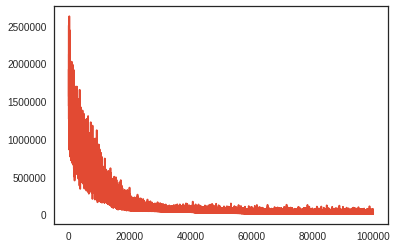

In [122]:
plt.plot(approx.hist);

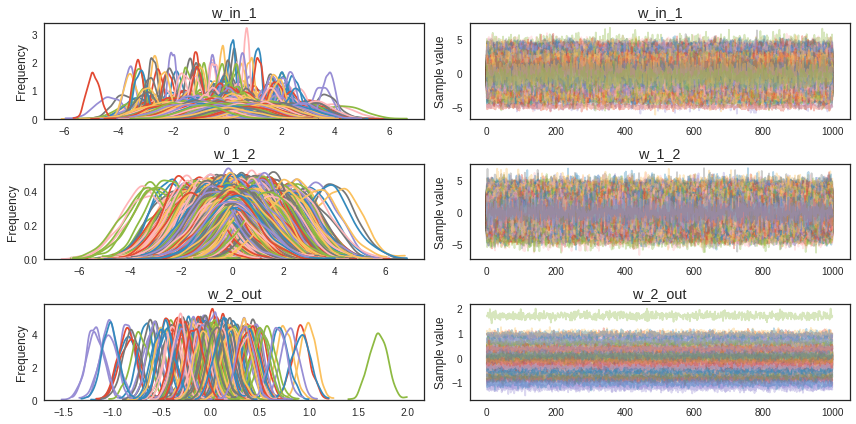

In [123]:
trace = approx.sample(draws=1000)
pm.traceplot(trace);

In [124]:
# Replace shared variables with testing set
ann_input.set_value(X_test.values)
ann_output.set_value(Y_test.values)

# Creater posterior predictive samples
ppc = pm.sample_ppc(trace, model=neural_network1, samples=5000)

# Use probability of > 0.5 to assume prediction of class 1
pred = ppc['likelihood'].mean(axis=0) > 0.5

100%|██████████| 1500/1500 [23:21<00:00,  1.07it/s]


In [125]:
pred=pred.flatten()

In [126]:
pred=1*pred

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,Y_test.values)

0.9988588883817282

In [171]:
from sklearn.metrics import recall_score,precision_score
recall_score(Y_test.values,pred)

0.74489795918367352

In [156]:
pred_probab=pd.DataFrame(ppc['likelihood'].mean(axis=0),columns=['1'])

In [157]:
pred_probab['0']=1-pred_probab['1']

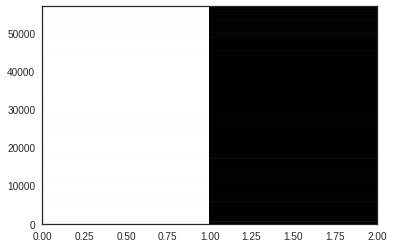

In [167]:
plt.pcolor(pred_probab.values)

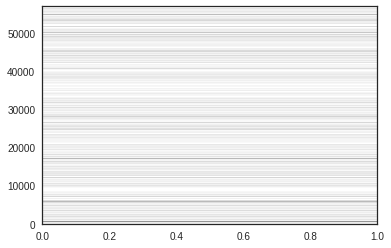

In [169]:
plt.pcolor(ppc['likelihood'].std(axis=0))

In [170]:
from sklearn.metrics import classification_report

print(classification_report(Y_test.values, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56864
          1       0.65      0.74      0.69        98

avg / total       1.00      1.00      1.00     56962



# Do not use below

In [306]:
def make_nn(ann_input, ann_output, n_hidden):
    """
    Makes a feed forward neural network with n_hidden layers for doing multi-
    class classification.
    
    Feed-forward networks are easy to define, so I have not relied on any 
    other Deep Learning frameworks to define the neural network here.
    """
    init_1 = np.random.randn(ann_input.shape[1], n_hidden)
    init_2 = np.random.randn(n_hidden, n_hidden)
    init_out = np.random.randn(n_hidden, ann_output.shape[1])
    
    with pm.Model() as nn_model:
        # Define weights
        weights_1 = pm.Normal('w_1', mu=0, sd=1, 
                              shape=(ann_input.shape[1], n_hidden),
                              testval=init_1)
        weights_2 = pm.Normal('w_2', mu=0, sd=1,
                              shape=(n_hidden, n_hidden),
                              testval=init_2)
        weights_out = pm.Normal('w_out', mu=0, sd=1, 
                                shape=(n_hidden, ann_output.shape[1]),
                                testval=init_out)

        # Define activations
        acts_1 =  pm.math.tanh(pm.math.dot(ann_input, weights_1))
        acts_2 = pm.math.tanh(pm.math.dot(acts_1, weights_2))
        acts_out =  pm.math.sigmoid(pm.math.dot(acts_2, weights_out))
        
        # Define likelihood
        out = pm.Bernoulli('likelihood', p=acts_out, 
                             observed=ann_output)
        
    return nn_model

In [348]:
n_hidden = 20  

In [349]:
ann_input = theano.shared(X_train.values)
ann_output = theano.shared(Y_train.values)
model = make_nn(X_train.values, Y_train.values, n_hidden=n_hidden)

In [350]:
with model:
    # s = theano.shared(pm.floatX(1.1))
    # inference = pm.ADVI(cost_part_grad_scale=s)
    approx = pm.fit(50000,method='advi', 
                    callbacks=[pm.callbacks.CheckParametersConvergence(tolerance=1e-1)])

Average Loss = 429.56: 100%|██████████| 50000/50000 [01:46<00:00, 469.85it/s]
Finished [100%]: Average Loss = 429.53


In [351]:
with model:
    samp_ppc = pm.sample_ppc(trace, samples=1000)

100%|██████████| 1000/1000 [00:01<00:00, 663.14it/s]


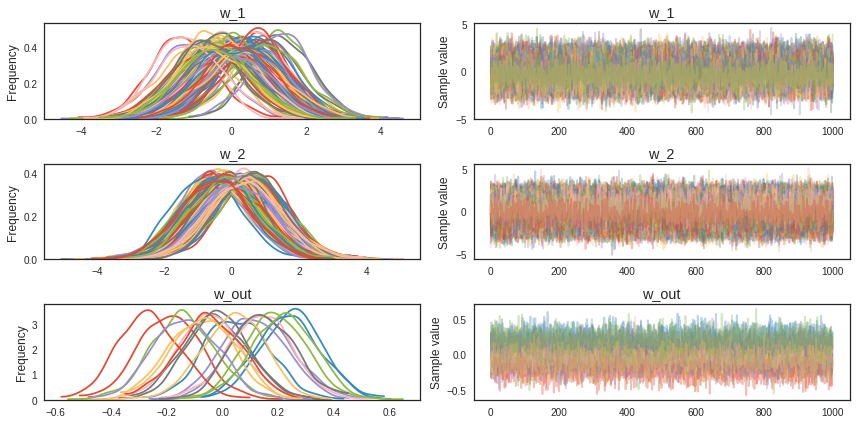

In [352]:
trace = approx.sample(draws=1000)
pm.traceplot(trace);

In [316]:
preds_proba = samp_ppc['likelihood'].mean(axis=0)
#preds = (preds_proba == np.max(preds_proba, axis=1, keepdims=True)) * 1
#plt.pcolor(preds)
#plt.savefig('class_predictions.png', dpi=600)

In [324]:
# Use probability of > 0.5 to assume prediction of class 1
preds_proba_train=preds_proba

In [353]:
# Replace shared variables with testing set
#ann_input = theano.shared(X_train.values)
#ann_output = theano.shared(Y_train.values)
ann_input.set_value(X_test.values)
ann_output.set_value(Y_test.values)

# Creater posterior predictive samples
ppc = pm.sample_ppc(trace, model=model, samples=1500)

# Use probability of > 0.5 to assume prediction of class 1
pred = ppc['likelihood'].mean(axis=0) > 0.5

100%|██████████| 1500/1500 [00:02<00:00, 608.60it/s]


In [354]:
pred.shape

(614, 1)

In [355]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,Y_train.values)

0.74429967426710097

In [105]:
# create symbolic input
#x = tt.matrix('X')
# symbolic number of samples is supported, we build vectorized posterior on the fly
#n = tt.iscalar('n')
# Do not forget test_values or set theano.config.compute_test_value = 'off'
#x.tag.test_value = np.empty_like(X_train[:10])
#n.tag.test_value = 100
#_sample_proba = approx.sample_node(neural_network.out.distribution.p,
#                                   size=n,
#                                   more_replacements={ann_input: x})
# It is time to compile the function
# No updates are needed for Approximation random generator
# Efficient vectorized form of sampling is used
#sample_proba = theano.function([x, n], _sample_proba)

In [53]:
pred = sample_proba(X_test.values, 500).mean(0) > 0.5

In [56]:
#pred

In [54]:
print('Accuracy = {}%'.format((Y_test.values == pred).mean() * 100))

Accuracy = 50.0%


# Example code from website PyMC3

In [23]:
def construct_nn(ann_input,ann_output):
    # Number of neurons in the hidden layer
    n_hidden=50
    # Initializing with random weights
    init_1=np.random.randn(X_train.shape[1],n_hidden).astype(floatX)
    init_2=np.random.randn(n_hidden,n_hidden).astype(floatX)
    init_out=np.random.randn(n_hidden,Y_train_1hot.shape[1]).astype(floatX)
    
    # Creating the with object for Bayesian Model
    with pm.Model() as neural_network:
        # weights for input layer by imposing Normal Distribuition on them
        weights_in_1=pm.Normal('w_in_1',mu=0,sd=1,shape=(X_train.shape[1],n_hidden),testval=init_1)
        weights_1_2=pm.Normal('w_1_2',mu=0,sd=1,shape=(n_hidden,n_hidden),testval=init_2)
        weights_2_out=pm.Normal('w_2_out',mu=0,sd=1,shape=(n_hidden,Y_train_1hot.shape[1]),testval=init_out)
        
        # activations computing the dot product with the wieghts automatically gives a normal dist of acts
        act_1=pm.Deterministic('activation_1',tt.tanh(tt.dot(ann_input,weights_in_1)))
        act_2=pm.Deterministic('activation_2',tt.tanh(tt.dot(act_1,weights_1_2)))
        act_out=pm.Deterministic('activation_out',tt.nnet.sigmoid(tt.dot(act_2,weights_2_out)))
        
        # Binary Classification --> Bernoulli Likelihood
        out = pm.Bernoulli('out',
                           p=act_out,
                           observed=ann_output,
                           total_size=Y_train.shape[0] # IMPORTANT for minibatches
                          )
        
    return neural_network

In [24]:
ann_input = theano.shared(X_train.values)
ann_output = theano.shared(Y_train_1hot.values)
neural_network = construct_nn(ann_input, ann_output)

In [ ]:
xcols=X_train.columns.tolist()
X_train=StandardScaler().fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=xcols)

In [7]:
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.metrics import zero_one_loss
#from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
#from sklearn.ensemble import AdaBoostClassifier

In [72]:
#from logitboost import LogitBoostClassifier

In [9]:
#from sklearn.model_selection import train_test_split

In [43]:
#data[8]=data[8].map({1:1,2:-1})

In [44]:
#Y=data[8]
#X=data.drop(8,axis=1)

In [45]:
#from sklearn.preprocessing import StandardScaler
#X=StandardScaler().fit_transform(X)
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=0)

In [73]:
#classifier = LogitBoostClassifier(base_estimator=DecisionTreeRegressor(max_depth=3),n_estimators=30,learning_rate=1.0,random_state=0)

In [11]:
#classifier.fit(X_train, np.sign(Y_train.ravel()))

In [11]:
data=data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

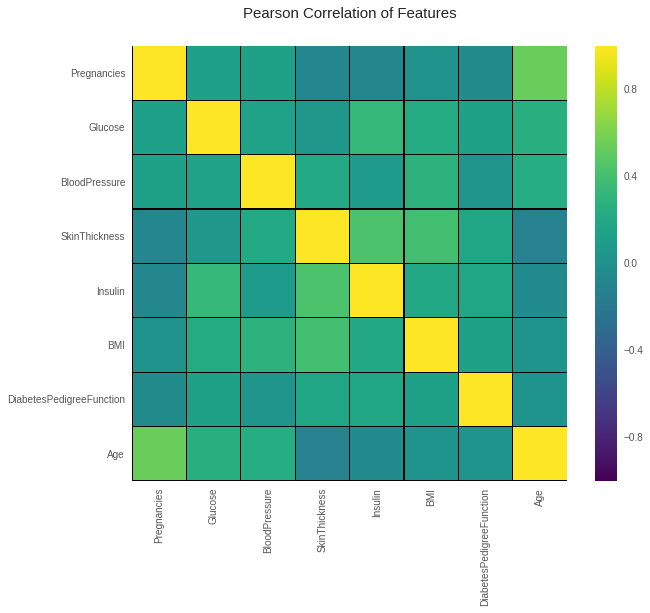

In [17]:
data_num=data.drop('Outcome',axis=1)
colormap = plt.cm.viridis
plt.figure(figsize=(10,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_num.astype(float).corr(),linewidths=0.05,vmax=1.0, square=True, cmap=colormap, linecolor='black', annot=False);

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

In [93]:
#data_noised=data

In [94]:
#data_noised.shape

(569, 11)

In [95]:
#indices=np.random.randint(0,len(data),size=[160,1])

In [96]:
#x=data_noised['diagnosis']

In [97]:
#x=x.tolist()

In [98]:
#x[i]

In [99]:
# introducing random noise
#for i in range(len(indices)):
#    if x[i]=='M':
#        x[i]='B'
#    elif x[i]=='B' :
#        x[i]='M'

In [100]:
#data_noised['diagnosis']=x

In [101]:
#data_noised['diagnosis'].value_counts()

B    365
M    204
Name: diagnosis, dtype: int64

# 3. Noise Model 1: Robust Logistic Regression Classifier

In [11]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    s = 1/(1+np.exp(-z))


    return s


In [106]:
#gamma=np.random.random((2,2))*0.01

In [11]:
#def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ###
#    w = np.zeros((dim,1))
#    b = 0
#    gamma=np.random.random((2,2))*0.01
    ### END CODE HERE ###

#    assert(w.shape == (dim, 1))
#    assert(isinstance(b, float) or isinstance(b, int))
    
#    return w, b,gamma

In [ ]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    """
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid((np.dot(w.T,X)+b))
    # compute activation
    SN1=gamma[0,1]*(1-A)+gamma[1,1]*(A)
    SN0=gamma[0,0]*(1-A)+gamma[1,0]*A)
    cost = (-1/m)*np.sum(Y*np.log(SN1)+(1-Y)*np.log(SN0)   
    # computed which is based on the flipping probabilities cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    #dw = (1/m)*np.dot(X,(A-Y).T)
    dw=
    db = (1/m)*np.sum(A-Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost
"""

In [12]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Has Diabetes
1,1,85,66,29,0,26.6,0.351,31,No Diabetes
2,8,183,64,0,0,23.3,0.672,32,Has Diabetes
3,1,89,66,23,94,28.1,0.167,21,No Diabetes
4,0,137,40,35,168,43.1,2.288,33,Has Diabetes


In [13]:
data['Outcome']=data['Outcome'].map({'Has Diabetes':1,'No Diabetes':0})

In [14]:
#Y=data['diagnosis']
#X=data.drop('diagnosis',axis=1)
Y=data['Outcome']
X=data.drop('Outcome',axis=1)

In [15]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [16]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=0)

In [19]:
X_train.shape

(614, 8)

In [20]:
Y_train.shape

(614,)

In [21]:
def addbias(X):
    X_bias=np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
    return X_bias

In [20]:
#X=np.random.random((2,2))
#biased=addbias(X)

In [22]:
def castLabel(y, t):
    if -1 in y:
        if t == -1:
            y_new = y
        elif t == 0:
            y_new = np.divide((y + 1) ,2)
        elif t == 2:
            y_new = np.divide((y + 3),2)
    elif 0 in y:
        if (t == -1):
            y_new = (y * 2) - 1
        elif (t == 0):
            y_new = y
        elif (t == 2):
            y_new = y + 1
    elif 2 in y:
        if (t == -1):
            y_new = (y * 2) - 3
        elif (t == 0):
            y_new = y - 1
        elif (t == 2):
            y_new = y
    return y_new

In [19]:
#y=np.array([1,1,0,0,1,0])
#y=np.reshape(y,(6,1))
#castLabel(y,2)

In [20]:
#np.random.rand(y.shape[0],1)

In [21]:
#y_ck=np.array([1,1,0,0,1,0])
#y_ck=np.reshape(y_ck,(6,1))

In [23]:
def injectLabelNoise(y,flipRate):
    fd  =  -np.ones((y.shape))
    yz  =  castLabel(y,-1)
    y   =  castLabel(y,2)
    # sampling some numbers
    for i in range(0,2):
        prob    = np.random.rand(y.shape[0],1)
        idx     = np.where((y==i+1) & (prob <= flipRate[i]))
        #print(idx)
        yz[idx[0]] = -yz[idx[0]]
        fd[idx[0]] = -fd[idx[0]]
    yz = castLabel(yz,2)
    return yz, fd

In [20]:
#yz, fd=injectLabelNoise(y_ck, [[0.8,0.2],[0.2,0.8]])

In [21]:
#print(yz)

In [76]:
#def standardise():
    # Use sklearn standard scaler here

In [24]:
def gammapdf(x,k,theta):
    x= np.absolute(x)
    y=np.multiply(np.power(x,(k-1)),np.exp(-x/theta))/(np.power(theta,k) * sci.misc.factorial(k-1))
    y=y.reshape(y.shape[0],1)
    return y

In [25]:
def regParam(w, regType, sn=1e-8):

    lamb_da = np.zeros((w.shape[0],))
    if regType == "lasso":
        lamb_da[:] = np.divide(1 , np.sqrt(np.power(w,2) + sn))
    elif regType == "l2":
        lamb_da[:] = (length(w)/2 + 1) / np.sum(np.power(w[2:end],2)/2 + 2)
    elif regType == "noreg":
        lamb_da[:] = 0
    lamb_da[1] = 0
   # print('The shape of lambda: ',lamb_da.shape)
    return lamb_da

In [26]:
def regFunc(w, regType, sn=1e-8):

    if regType == "noreg":
        regV  = 0
        regDV = 0
    elif regType == "lasso":
        regV  = np.sqrt(np.power(w,2) + sn)
        #print(regV.shape)
        regDV = np.divide(w,np.sqrt(np.power(w,2) + sn))
        #print(regDV.shape)
    elif regType == "l2":
        regV  = np.sum(np.power(w,2))
        regDV = w*2

    return regV, regDV

In [249]:
#ndata=10
#dist=np.ones((ndata,1))
#dist.shape

(10, 1)

In [27]:
import scipy as sci
from scipy.optimize import minimize

In [28]:
def rlr(w,gamma,x,y,sn=1e-8,maxIter=100,dist=1,estG=True,regType="noreg"):
    #shape of the data
    ndata,dim=x.shape
    
    # y={0,1} ensuring
    y=castLabel(y,0)
    y=y.reshape(y.shape[0],1)
    #print(y)
    if dist!=ndata:
        dist=np.ones((ndata,1))
    
    llh= []
    for l in range(1,maxIter):
        # storage for likelihood values
        if l==1:
            lamb_da=regParam(w,"noreg",sn)
        else:
            lamb_da=regParam(w,regType,sn)

        t=np.dot(x,w)
        #print(t.shape)
        A=sigmoid(t)
        A=A.reshape(A.shape[0],1)
        if estG:

            # multiplicative update for the gamma matrix

            #SN0=gamma[0,0]*(np.divide(1,A))+gamma[1,0]*(A)
            #SN1=gamma[0,1]*(np.divide(1,A))+gamma[1,1]*(A)
            # my implementation
            SN0=gamma[0,0]*((1-A))+gamma[1,0]*(A)
            SN1=gamma[0,1]*((1-A))+gamma[1,1]*(A)
            #print(SN0.shape)
            #print(dist.shape)
            #print(y.shape)
            #print(SN1.shape)
            SN0=SN0.reshape(A.shape[0],1)
            SN1=SN1.reshape(A.shape[0],1)
            # avoiding numerical problem
            SN0[SN0==0]=1e-8
            SN1[SN1==0]=1e-8

            #
            #g00=gamma[0,0]*np.sum(np.multiply(np.divide(np.multiply(dist,(1-y)),SN0),np.divide(1,A)))
            g00=gamma[0,0]*np.sum(np.multiply(np.divide(np.multiply(dist,(1-y)),SN0),(1-A))) #mine
            #print(g00)
            #g01=gamma[0,1]*np.sum(np.multiply(np.divide(np.multiply(dist,(y)),SN1),np.divide(1,A)))
            g01=gamma[0,1]*np.sum(np.multiply(np.divide(np.multiply(dist,(y)),SN1),(1-A))) #mine
            #print(g01)

            #lagrangian
            g11=np.divide(g00,(g00+g01))

            gamma[0,0]=g11
            gamma[0,1]=1-g11

            g10=gamma[1,0]*np.sum(np.multiply(np.divide(np.multiply(dist,(1-y)),SN0),A))
            g11=gamma[1,1]*np.sum(np.multiply(np.divide(np.multiply(dist,(y)),SN1),A))

            #lagrangian

            g21=np.divide(g10,(g10+g11))

            gamma[1,0]=g21
            gamma[1,1]=1-g21
        
        #w, fx, iter = minimize(w, gradw, 10, g, x, y, lamb_da, dist, regType)
        #jaco=gradw(w,gamma,x,y,lamb_da,dist,regType)
        _res= minimize(cost_function,w,jac=gradw,method='CG',args=(gamma,x, y, lamb_da,dist,regType)) #,iters to RHS
        #print(_res)
        w=_res.x
        llh.append(_res.fun)
        #g=gamma
    
    return w,gamma,llh

In [29]:
def gradw(w,gamma,x,y,lamb_da,dist,regType):
    
    regV,regDV=regFunc(w,regType,1e-8)
    regV=regV.reshape(regV.shape[0],1)
    regDV=regDV.reshape(regDV.shape[0],1)
    lamb_da=lamb_da.reshape(lamb_da.shape[0],1)
    t=np.dot(x,w)
    A=sigmoid(t)
    A=A.reshape(A.shape[0],1)
     # multiplicative update for the gamma matrix
        
    #SN0=gamma[0,0]*(np.divide(1,A))+gamma[1,0]*(A)
    #SN1=gamma[0,1]*(np.divide(1,A))+gamma[1,1]*(A)
    # my implementation
    SN0=gamma[0,0]*((1-A))+gamma[1,0]*(A)
    SN1=gamma[0,1]*((1-A))+gamma[1,1]*(A)
    SN0=SN0.reshape(A.shape[0],1)
    SN1=SN1.reshape(A.shape[0],1)
    # avoiding numerical problem
    SN0[SN0==0]=1e-8
    SN1[SN1==0]=1e-8
    # loss function value
    # derivative of loss function
    
    tmp1=(gamma[1,1]-gamma[0,1])*np.divide(np.multiply(dist,y),SN1)
    tmp2=(gamma[1,0]-gamma[0,0])*np.divide(np.multiply(dist,1-y),SN0)
    #print(tmp1.shape)
    #print(tmp2.shape)
    
    #gAux1=np.multiply(np.divide((tmp1+tmp2),A),np.divide(1,A))
    # my implementation
    gAux1=np.multiply(np.multiply((tmp1+tmp2),A),(1-A))
    #print(gAux1.shape)
    import numpy.matlib
    gAux2=np.multiply(numpy.matlib.repmat(gAux1,1,x.shape[1]),x)
   # print(gAux2.shape)
    #temp=np.multiply(lamb_da,regDV.reshape((11,1)))
    #print(temp.shape)
    dfv=-(np.sum(gAux2)).T+np.multiply(lamb_da,regDV)
    #temp2=-(np.sum(gAux2)).T
    #print(temp2.shape)
    dfv=(dfv.reshape(dfv.shape[0],))
    return dfv

In [30]:
def cost_function(w,gamma,x,y,lamb_da,dist,regType):
    regV,regDV=regFunc(w,regType,1e-8)
    regV=regV.reshape(regV.shape[0],1)
    regDV=regDV.reshape(regDV.shape[0],1)
    lamb_da=lamb_da.reshape(lamb_da.shape[0],1)
    t=np.dot(x,w)
    A=sigmoid(t)
    A=A.reshape(A.shape[0],1)
     # multiplicative update for the gamma matrix
        
    #SN0=gamma[0,0]*(np.divide(1,A))+gamma[1,0]*(A)
    #SN1=gamma[0,1]*(np.divide(1,A))+gamma[1,1]*(A)
    #my implementation
    SN0=gamma[0,0]*((1-A))+gamma[1,0]*(A)
    SN1=gamma[0,1]*((1-A))+gamma[1,1]*(A)
    SN0=SN0.reshape(A.shape[0],1)
    SN1=SN1.reshape(A.shape[0],1)
        
    # avoiding numerical problem
    SN0[SN0==0]=1e-8
    SN1[SN1==0]=1e-8
    # loss function value
    
    fv=-np.sum(np.multiply(np.multiply(dist,y),np.log(SN1))+np.multiply(np.multiply((1-y),dist),np.log(SN0)))+ np.sum(np.multiply(lamb_da,regV))
    #print(fv)
    return fv

In [30]:
#def unpack_thetas(self, thetas, input_layer_size, hidden_layer_size, num_labels):
    #t1_start = 0
    #t1_end = hidden_layer_size * (input_layer_size + 1)
#    t1 = thetas[t1_start:t1_end].reshape((hidden_layer_size, input_layer_size + 1))
#    t2 = thetas[t1_end:].reshape((num_labels, hidden_layer_size + 1))
#    return t1, t2

In [30]:
#X_train=addbias(X_train)

In [31]:
#X_train.shape

(455, 11)

In [32]:
#X_test=addbias(X_test)

In [33]:
#X_test.shape

(114, 11)

In [37]:
#n_train_data,dim=X_train.shape

In [38]:
#n_test_data,dim_test=X_test.shape

In [36]:
#winit = np.random.rand(dim,1)

In [37]:
#winit.shape

(11, 1)

In [69]:
#Y_train=Y_train.values.reshape(n_train_data,1)

In [70]:
#Y_test=Y_test.values.reshape(n_test_data,1)

In [31]:
#Y_train

In [32]:
#yz, fd = injectLabelNoise(Y_train, [0.3,0.7])

In [33]:
#yz=castLabel(yz,0)

In [55]:
#yz==Y_train

In [34]:
#gamma=np.array([[0.8,0.2],[0.2,0.8]])

In [35]:
#t=np.dot(X_train,winit)

In [36]:
#w, g, llh = rlr(winit, gamma, X_train, yz, regType="lasso")

In [37]:
#w=w.reshape(11,1)

In [38]:
#castLabel(Y_test,-1)

In [39]:
#check=(np.sign(np.dot(X_test,w))!=castLabel(Y_test,-1))

(11,)

In [40]:
#check.shape

In [41]:
#np.sum(np.sign(np.dot(X_test,w))!=castLabel(Y_test,-1))/(Y_test.shape[0])

In [42]:
#err_rlr=[]

In [44]:
#X.head()

In [45]:
#Y.head()

In [72]:
#import bigfloat
#bigfloat.exp(5000,bigfloat.precision(100))

## 3.1 Robust Logistic Regression Classifier Vs. Normal Logistic Regression Classifier

In [37]:
#err_rlr=[]
#i=0
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)
#X_train=StandardScaler().fit_transform(X_train)
#X_test=StandardScaler().fit_transform(X_test)
#n_train_data,dim=X_train.shape
#n_test_data,dim_test=X_test.shape
#X_train=addbias(X_train)
#X_test=addbias(X_test)
#Y_train=Y_train.values.reshape(n_train_data,1)
#Y_test=Y_test.values.reshape(n_test_data,1)
#n_train_data,dim=X_train.shape
#n_test_data,dim_test=X_test.shape
#winit = np.random.rand(dim,1)

#yz, fd = injectLabelNoise(Y_train,[0.8,0.2])
#gamma=np.array([[0.8,0.2],[0.2,0.8]])
#w, g, llh = rlr(np.random.randn(dim,1)*0.1, gamma, X_train, yz, regType="lasso")
#w=w.reshape(dim,1)
#err_rlr.append(np.sum(np.sign(np.dot(X_test,w))!=castLabel(Y_test,-1))/len(Y_test))
#print(err_rlr[i])

### 3.1.1 Performance of Logistic Regression Classifier with 30% Avg Assymetric Noise Injected into the Data

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2017,shuffle=True)
#X_train=StandardScaler().fit_transform(X_train)
#X_test=StandardScaler().fit_transform(X_test)

In [33]:
Y_train=Y_train.reshape(Y_train.shape[0],1)

In [56]:
yz, fd = injectLabelNoise(Y_train,[[0.7,0.3],[0.3,0.7]])

In [161]:
clf=LogisticRegression()
clf.fit(X_train, Y_train)
pred_lg=clf.predict(X_test)
pred_probs_nonoise=clf.predict_proba(X_test)

In [162]:
#pred_probs_nonoise_train.shape

In [163]:
pred_probs_nonoise=pred_probs_nonoise[:,1]

In [164]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

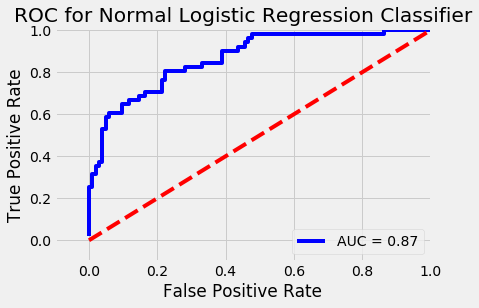

In [165]:
fpr, tpr, thresholds = roc_curve(Y_test.ravel(),pred_probs_nonoise.ravel())
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.title('ROC for Normal Logistic Regression Classifier')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [134]:
clf=LogisticRegression()
clf.fit(X_train, yz)
pred_lg=clf.predict(X_test)
pred_probs=clf.predict_proba(X_test)

In [135]:
pred_probs=pred_probs[:,1]

In [136]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

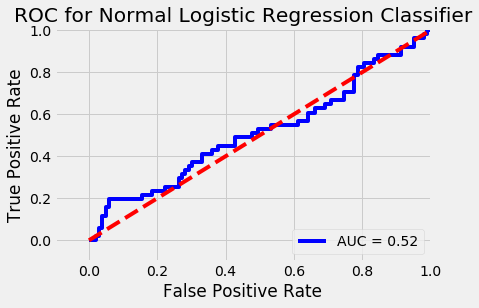

In [137]:
fpr, tpr, thresholds = roc_curve(Y_test.ravel(),pred_probs.ravel())
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.title('ROC for Normal Logistic Regression Classifier')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 3.1.2 Performance of Robust Logistic Regression Classifier with 30% Avg Assymetric Noise Injected into the Data

In [217]:
err_rlr=[]
w_iter=[]

for i in range(11):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2017,shuffle=True)
    X_train=StandardScaler().fit_transform(X_train)
    X_test=StandardScaler().fit_transform(X_test)
    n_train_data,dim=X_train.shape
    n_test_data,dim_test=X_test.shape
    X_train=addbias(X_train)
    X_test=addbias(X_test)
    Y_train=Y_train.values.reshape(n_train_data,1)
    Y_test=Y_test.values.reshape(n_test_data,1)
    n_train_data,dim=X_train.shape
    n_test_data,dim_test=X_test.shape
    winit = np.random.rand(dim,1)

    #yz, fd = injectLabelNoise(Y_train,[0.7,0.3])
    yz, fd = injectLabelNoise(Y_train,[[0.7,0.3],[0.3,0.7]])
    gamma=np.array([[0.7,0.3],[0.3,0.7]])
    #gamma=np.array([[1.0,0.0],[0.0,1.0]])
    w, g, llh = rlr(np.random.randn(dim,1)*0.1, gamma, X_train, yz, regType="lasso",maxIter=150)
    #w, g, llh = rlr(np.random.randn(dim,1)*0.1, gamma, X_train, Y_train, regType="lasso",maxIter=150)
    w=w.reshape(dim,1)
    err_rlr.append(np.sum(np.sign(np.dot(X_test,w))!=castLabel(Y_test,-1))/len(Y_test))
    print(err_rlr[i])
    w_iter.append(w)
    w_final=w_iter[np.argmin(err_rlr)]
print('The final error: ',sum(err_rlr)/11)

0.694805194805
0.681818181818
0.62987012987
0.603896103896
0.733766233766
0.642857142857
0.655844155844
0.688311688312
0.720779220779
0.655844155844
0.649350649351
The final error:  0.668831168831


In [104]:
#yz, fd = injectLabelNoise(Y_train,[[0.7,0.3],[0.3,0.7]])

In [57]:
Y_train_orig=pd.DataFrame(Y_train,columns=['before_noise'])

In [58]:
Y_train_orig['before_noise'].value_counts()

0    397
1    217
Name: before_noise, dtype: int64

In [46]:
Y_train_orig['before_noise']=Y_train_orig['before_noise'].map({1:'Has Diabetes',0:'No Diabetes'})

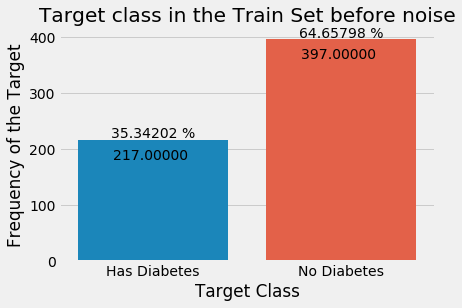

In [47]:
#import matplotlib.style as style
#style.use('fivethirtyeight')
ax=sns.countplot(x="before_noise", data=Y_train_orig,order=['Has Diabetes','No Diabetes']);
total=float(len(Y_train_orig))
plt.title('Target class in the Train Set before noise')
plt.ylabel('Frequency of the Target')
plt.xlabel('Target Class')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.5f} %'.format(height*100/total),ha="center")
    ax.text(p.get_x()+p.get_width()/2.,height - 35,'{:1.5f} '.format(height),ha="center") 

In [39]:
Y_test_orig=pd.DataFrame(Y_test.values,columns=['before_noise'])

In [40]:
Y_test_orig['before_noise']=Y_test_orig['before_noise'].map({1:'Has Diabetes',0:'No Diabetes'})

In [41]:
Y_test_orig.head()

,before_noise
0,No Diabetes
1,Has Diabetes
2,Has Diabetes
3,Has Diabetes
4,Has Diabetes


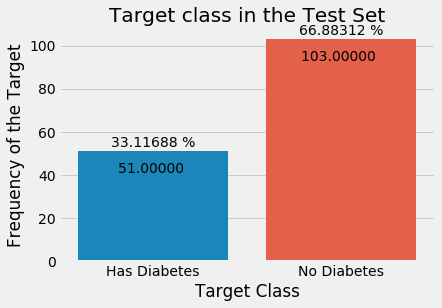

In [42]:
ax=sns.countplot(x="before_noise", data=Y_test_orig,order=['Has Diabetes','No Diabetes']);
total=float(len(Y_test_orig))
plt.title('Target class in the Test Set')
plt.ylabel('Frequency of the Target')
plt.xlabel('Target Class')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 2,'{:1.5f} %'.format(height*100/total),ha="center")
    ax.text(p.get_x()+p.get_width()/2.,height - 10,'{:1.5f} '.format(height),ha="center") 

In [59]:
yz=castLabel(yz,0)

In [60]:
Y_train_noise=pd.DataFrame(yz,columns=['after_noise'])

In [61]:
Y_train_noise['after_noise'].value_counts()

1.0    337
0.0    277
Name: after_noise, dtype: int64

In [62]:
Y_train_noise['after_noise']=Y_train_noise['after_noise'].map({1:'Has Diabetes',0:'No Diabetes'})

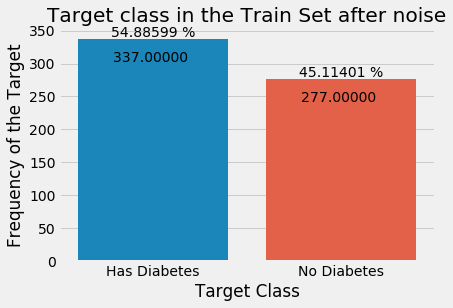

In [63]:
ax=sns.countplot(x="after_noise", data=Y_train_noise,order=['Has Diabetes','No Diabetes']);
total=float(len(Y_train_noise))
plt.title('Target class in the Train Set after noise')
plt.ylabel('Frequency of the Target')
plt.xlabel('Target Class')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.5f} %'.format(height*100/total),ha="center")
    ax.text(p.get_x()+p.get_width()/2.,height - 35,'{:1.5f} '.format(height),ha="center") 

In [225]:
print(w_final)

[[-0.45295854]
 [-0.46897819]
 [-0.07518528]
 [-0.05691689]
 [-0.37838359]
 [-0.36756309]
 [-0.08327974]
 [-0.34896679]
 [-0.37090051]]


In [226]:
from sklearn.metrics import accuracy_score

In [227]:
accuracy_score(castLabel(Y_test,-1), np.sign(np.dot(X_test,w_final)))

0.39610389610389612

In [228]:
Y_test=castLabel(Y_test,0)

In [229]:
probs=sigmoid(np.dot(X_test,w_final))

In [230]:
fpr, tpr, thresholds = roc_curve(Y_test.ravel(),probs.ravel())
roc_auc = auc(fpr,tpr)

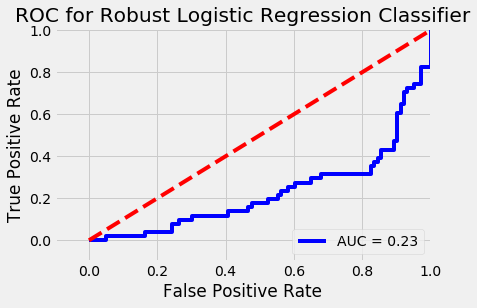

In [231]:
# Plot ROC
plt.title('ROC for Robust Logistic Regression Classifier')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 3.2 Generalized Robust Logistic Regression vs Logistic Regression

In [199]:
def glr(w, x, y, sn=1e-8, maxIter=100, estG=True, regType="noreg"):
    ndata,dim=x.shape
    
    y=castLabel(y,0)
    y=y.reshape(y.shape[0],1)
    if (np.sum(x[:,0]) != ndata):
        print("Bias terms might have not been added")
    
    llh= []
    
    t0=500
    t1=500
    
    t=np.dot(x,w)
    
    z  = t/np.linalg.norm(w)
    z=z.reshape(z.shape[0],1)
    lamb_da = regParam(w, "noreg", sn)
    lamb_da=lamb_da.reshape(lamb_da.shape[0],1)
    
    for l in range(1,maxIter):
        
        bReg0=-1/1-t0
        bReg1=-1/1-t1
        
        if l==1:
            g01=np.ones((y.shape[0],1))*0.2
            
            g10=np.ones((y.shape[0],1))*0.2
        else:
            g01=gammapdf(z,3,t0)
            g01=g01.reshape(g01.shape[0],1)
            g10=gammapdf(z,2,t1)
            g10=g10.reshape(g10.shape[0],1)
        
        # should set it accordingly
        _resglr= minimize(cost_func_glr,w,jac=gradw_glr,method='CG',args=(g01, g10, x, y, bReg0, bReg1, lamb_da, regType),options={'gtol': 1e-05, 'eps': 1.4901161193847656e-08}) #,iters to RHS
        #_res= minimize(cost_function,w,jac=gradw,method='CG',args=(gamma,x, y, lamb_da,dist,regType)) #,iters to RHS
        #gradw(w,gamma,x,y,lamb_da,dist,regType)
    
        w=_resglr.x # updated weight vector
        
        t=np.dot(x,w)
        
        z  = t/np.linalg.norm(w)
        z=z.reshape(z.shape[0],1)
        lamb_da = regParam(w, regType, sn)
        
        # calculating regularisation for w
        regV, regDV = regFunc(w, regType, sn)
        #ensuring the shape
        regV=regV.reshape(regV.shape[0],1)
        regDV=regDV.reshape(regDV.shape[0],1)
        lamb_da=lamb_da.reshape(lamb_da.shape[0],1)
        
        regW = np.sum(np.multiply(lamb_da,regV))
        
        # noise parameters
        
        if estG:
            
            _tres0=minimize(cost_func_gradt1,t0,jac=gradt0,method='CG',args=(z,t,y,t1,regW,bReg0,bReg1),options={'gtol': 1e-05, 'eps': 1.4901161193847656e-08} ) # should be changed accordinly
            _tres1=minimize(cost_func_gradt1,t1,jac=gradt1,method='CG',args=(z,t,y,t0,regW,bReg0,bReg1),options={'gtol': 1e-05, 'eps': 1.4901161193847656e-08} ) # should be changed accordingly
            
        llh.append(_tres1.fun) # should change
        t0=_tres0.x
        t1=_tres1.x
        
    return w,t0,t1,llh

In [200]:
# function definition for 'minFunc' optimiser
# fv  = function value
# for non-uniform noise rate model

def cost_func_glr(w, g01, g10, x, y, bReg0, bReg1, lamb_da, regType):
    
    regV, regDV = regFunc(w, regType, 1e-8)
    # ensuring the shape of the parameters
    regV=regV.reshape(regV.shape[0],1)
    regDV=regDV.reshape(regDV.shape[0],1)
    lamb_da=lamb_da.reshape(lamb_da.shape[0],1)
    
    t=np.dot(x,w)
    
    A=sigmoid(t)
    A=A.reshape(A.shape[0],1)
    
    SN0=np.multiply((1-g01),(1-A))+np.multiply(g10,A)
    SN1=np.multiply((g01),(1-A))+np.multiply((1-g10),A)
    
    SN0=SN0.reshape(SN0.shape[0],1)
    SN1=SN1.reshape(SN1.shape[0],1)
    # avoiding numerical problem
    SN0[SN0==0]=np.finfo(float).eps
    SN1[SN1==0]=np.finfo(float).eps
    
    
    fv=-np.sum(np.multiply((y),np.log(SN1))+np.multiply((1-y),np.log(SN0)))+ np.sum(np.multiply(lamb_da,regV))+bReg0+bReg1
    
    
    return fv

In [201]:
# function definition for 'minFunc' optimiser
# dfv = gradient of the function w.r.t W
# for non-uniform noise rate model

def gradw_glr(w, g01, g10, x, y, bReg0, bReg1, lamb_da, regType):
    
    regV, regDV = regFunc(w, regType, 1e-8)
    # ensuring the shape of the parameters
    regV=regV.reshape(regV.shape[0],1)
    regDV=regDV.reshape(regDV.shape[0],1)
    lamb_da=lamb_da.reshape(lamb_da.shape[0],1)
    
    t=np.dot(x,w)
    
    A=sigmoid(t)
    A=A.reshape(A.shape[0],1)
    
    SN0=np.multiply((1-g01),(1-A))+np.multiply(g10,A)
    SN1=np.multiply((g01),(1-A))+np.multiply((1-g10),A)
    
    SN0=SN0.reshape(SN0.shape[0],1)
    SN1=SN1.reshape(SN1.shape[0],1)
    # avoiding numerical problem
    SN0[SN0==0]=np.finfo(float).eps
    SN1[SN1==0]=np.finfo(float).eps
    
     # loss function value
    # derivative of loss function
    
    tmp1=np.multiply((1-g10-g01),np.divide((y),SN1))
    tmp2=np.multiply((g10-(1-g01)),np.divide((1-y),SN0))
    #print(tmp1.shape)
    #print(tmp2.shape)
    
    gAux1=np.multiply((tmp1+tmp2),np.multiply(A,(1-A)))
    #print(gAux1.shape)
    import numpy.matlib
    gAux2=np.multiply(numpy.matlib.repmat(gAux1,1,x.shape[1]),x)
   # print(gAux2.shape)
    #temp=np.multiply(lamb_da,regDV.reshape((11,1)))
    #print(temp.shape)
    dfv=-(np.sum(gAux2)).T+np.multiply(lamb_da,regDV)
    #temp2=-(np.sum(gAux2)).T
    #print(temp2.shape)
    dfv=(dfv.reshape(dfv.shape[0],))
    return dfv

In [202]:
def cost_func_gradt1(t1,z,t,y,t0,regW,bReg0,bReg1):
    g01=gammapdf(z,3,t0)
    g10=gammapdf(z,2,t1)
    g01=g01.reshape(g01.shape[0],1)
    g10=g10.reshape(g10.shape[0],1)
    
    g00=1-g01
    g11=1-g10
    
    p1=sigmoid(t)
    p1=p1.reshape(p1.shape[0],1)
    p0=1-p1
    
    s0=np.multiply(g00,p0)+np.multiply(g10,p1)
    s1=np.multiply(g01,p0)+np.multiply(g11,p1)
    
    s0[s0==0]=np.finfo(float).eps
    s1[s1==0]=np.finfo(float).eps
    
    fv=-np.sum(np.multiply(y,np.log(s1))+np.multiply(1-y,np.log(s0)))+regW+np.multiply(bReg0,np.log(t0-1))+np.multiply(bReg1,np.log(t1-1))
    
    return fv

In [203]:
def cost_func_gradt0(t0,z,t,y,t1,regW,bReg0,bReg1):
    g01=gammapdf(z,3,t0)
    g10=gammapdf(z,2,t1)
    g01=g01.reshape(g01.shape[0],1)
    g10=g10.reshape(g10.shape[0],1)
    g00=1-g01
    g11=1-g10
    
    p1=sigmoid(t)
    p1=p1.reshape(p1.shape[0],1)
    p0=1-p1
    
    s0=np.multiply(g00,p0)+np.multiply(g10,p1)
    s1=np.multiply(g01,p0)+np.multiply(g11,p1)
    
    s0[s0==0]=np.finfo(float).eps
    s1[s1==0]=np.finfo(float).eps
    
    fv=-np.sum(np.multiply(y,np.log(s1))+np.multiply(1-y,np.log(s0)))+regW+np.multiply(bReg0,np.log(t0-1))+np.multiply(bReg1,np.log(t1-1))
    
    return fv

In [204]:
def gradt1(t1,z,t,y,t0,regW,bReg0,bReg1):
    g01=gammapdf(z,3,t0)
    g10=gammapdf(z,2,t1)
    g01=g01.reshape(g01.shape[0],1)
    g10=g10.reshape(g10.shape[0],1)
    g00=1-g01
    g11=1-g10
    
    p1=sigmoid(t)
    p1=p1.reshape(p1.shape[0],1)
    p0=1-p1
    
    s0=np.multiply(g00,p0)+np.multiply(g10,p1)
    
    s1=np.multiply(g01,p0)+np.multiply(g11,p1)
    
    s0[s0==0]=np.finfo(float).eps
    s1[s1==0]=np.finfo(float).eps
    
    tmp1=np.divide((1-y),s0)-np.divide(y,s1)
    tmp2=np.divide(np.multiply(g10,z),np.power(t1,2))-np.divide(g10,t1)
    
    gAux1=np.multiply(np.multiply(tmp1,tmp2),p1)
    dfv=-np.sum(gAux1).T+np.divide(bReg1,np.log(t1-1))
    
    dfv=(dfv.reshape(dfv.shape[0],))
    return dfv

In [205]:
def gradt0(t0,z,t,y,t1,regW,bReg0,bReg1):
    g01=gammapdf(z,3,t0)
    g10=gammapdf(z,2,t1)
    g01=g01.reshape(g01.shape[0],1)
    g10=g10.reshape(g10.shape[0],1)
    
    g00=1-g01
    g11=1-g10
    
    p1=sigmoid(t)
    p1=p1.reshape(p1.shape[0],1)
    p0=1-p1
    
    s0=np.multiply(g00,p0)+np.multiply(g10,p1)
    s1=np.multiply(g01,p0)+np.multiply(g11,p1)
    
    s0[s0==0]=np.finfo(float).eps
    s1[s1==0]=np.finfo(float).eps
    
    tmp1=-np.divide((1-y),s0)+np.divide(y,s1)
    tmp2=np.divide(np.multiply(g01,z),np.power(t0,2))-np.divide(g01,t0)
    
    gAux1=np.multiply(np.multiply(tmp1,tmp2),p0)
    dfv=-np.sum(gAux1).T+np.divide(bReg0,np.log(t0-1))
    
    dfv=(dfv.reshape(dfv.shape[0],))
    return dfv

In [120]:
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2017,shuffle=True)
#X_train=addbias(X_train)
#X_test=addbias(X_test)
#Y_train=Y_train.values.reshape(n_train_data,1)
#Y_test=Y_test.values.reshape(n_test_data,1)
#n_train_data,dim=X_train.shape
#n_test_data,dim_test=X_test.shape
#winit = np.random.rand(dim,1)
#yz, fd = injectLabelNoise(Y_train,[0.8,0.2])

In [119]:
#wg, t0, t1, llhg = glr(np.random.randn(dim,1)*0.1,X_train, yz, regType="lasso")

In [118]:
#wg=wg.reshape(wg.shape[0],1)

In [117]:
#wg

In [116]:
#(llhg)

In [115]:
#(np.sum(np.sign(np.dot(X_test,wg))!=castLabel(Y_test,-1))/len(Y_test))

In [114]:
#probs_glr=sigmoid(np.dot(X_test,wg))

In [113]:
#Y_test=castLabel(Y_test,0)

In [112]:
#fpr, tpr, thresholds = roc_curve(Y_test.ravel(),probs_glr.ravel())
#roc_auc = auc(fpr,tpr)

In [111]:
#plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
#plt.legend(loc='lower right')
#plt.plot([0,1],[0,1],'r--')
#plt.xlim([-0.1,1.0])
#plt.ylim([-0.1,1.01])
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
#plt.show()

In [232]:
err_glr=[]
w_iter=[]
for i in range(11):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2017,shuffle=True)
    X_train=addbias(X_train)
    X_test=addbias(X_test)
    Y_train=Y_train.values.reshape(n_train_data,1)
    Y_test=Y_test.values.reshape(n_test_data,1)
    n_train_data,dim=X_train.shape
    n_test_data,dim_test=X_test.shape
    winit = np.random.rand(dim,1)
    #yz, fd = injectLabelNoise(Y_train,[[0.7,0.3],[0.3,0.7]])
    yz, fd = injectLabelNoise(Y_train,[0.7,0.3])
    wg, t0, t1, llhg = glr(np.random.randn(dim,1)*0.1,X_train, yz, regType="lasso",maxIter=150)
    wg=wg.reshape(wg.shape[0],1)
    err_glr.append(np.sum(np.sign(np.dot(X_test,wg))!=castLabel(Y_test,-1))/len(Y_test))
    w_iter.append(wg)
    print(err_glr[i])
    w_iter.append(w)
    #w_final=w_iter[np.argmin(err_glr)]
print('The final error: ',sum(err_glr)/11)

0.305194805195
0.344155844156
0.448051948052
0.402597402597
0.331168831169
0.305194805195
0.402597402597
0.512987012987
0.266233766234
0.305194805195
0.409090909091
The final error:  0.366587957497


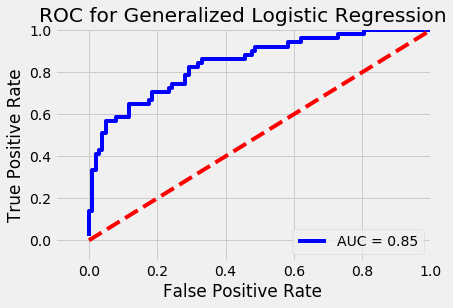

In [233]:
rocauc=[]
for j in range(len(w_iter)):
    w_final=w_iter[j]
    probs_glr=sigmoid(np.dot(X_test,w_final))
    Y_test=castLabel(Y_test,0)
    fpr, tpr, thresholds = roc_curve(Y_test.ravel(),probs_glr.ravel())
    rocauc.append(auc(fpr,tpr))
w_final=w_iter[np.argmax(rocauc)]
probs_glr=sigmoid(np.dot(X_test,w_final))
Y_test=castLabel(Y_test,0)
fpr, tpr, thresholds = roc_curve(Y_test.ravel(),probs_glr.ravel())
roc_auc=(auc(fpr,tpr))
plt.title('ROC for Generalized Logistic Regression')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [210]:
yz=castLabel(yz,0)

In [211]:
Y_train_noise=pd.DataFrame(yz,columns=['after_noise'])

In [212]:
Y_train_noise['after_noise'].value_counts()

1.0    340
0.0    274
Name: after_noise, dtype: int64

In [213]:
Y_train_noise['after_noise']=Y_train_noise['after_noise'].map({1:'Has Diabetes',0:'No Diabetes'})

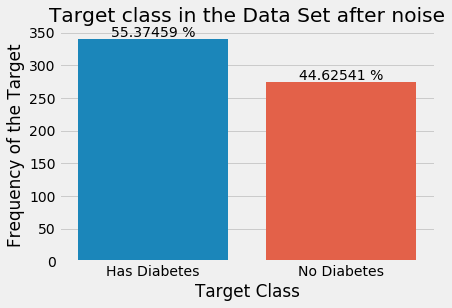

In [214]:
ax=sns.countplot(x="after_noise", data=Y_train_noise,order=['Has Diabetes','No Diabetes']);
total=float(len(Y_train_noise))
plt.title('Target class in the Data Set after noise')
plt.ylabel('Frequency of the Target')
plt.xlabel('Target Class')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.5f} %'.format(height*100/total),ha="center")

In [104]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2017,shuffle=True)
Y_train_noise, fd = injectLabelNoise(Y_train.ravel(),[0.7,0.3])

In [106]:
Y_train_noise=castLabel(Y_train_noise,0)

In [110]:
Y_train_noise=Y_train_noise.reshape(Y_train_noise.shape[0],1)

In [131]:
data_num=data.drop('diagnosis',axis=1)
train_df=pd.DataFrame(X_train,columns=list(data_num.columns))

In [132]:
train_df['target']=Y_train_noise

In [133]:
train_df['target']=train_df['target'].map({0:'B',1:'M'})

In [134]:
train_df.to_csv('diagnosis_train.csv',sep=';')

In [135]:
test_df=pd.DataFrame(X_test,columns=list(data_num.columns))

In [136]:
test_df['target']=Y_test.ravel()

In [137]:
test_df['target']=test_df['target'].map({0:'B',1:'M'})

In [138]:
test_df.to_csv('diagnosis_test.csv',sep=';')

# 4. Deep Neural Networks

# 4.1 Neural Network with 1 Hidden Layer

In [22]:
import numpy as np
from scipy import optimize
from __future__ import division

In [23]:
class NN_1HL(object):
    
    def __init__(self, reg_lambda=0, epsilon_init=0.12, hidden_layer_size=25, opti_method='TNC', maxiter=500):
        self.reg_lambda = reg_lambda
        self.epsilon_init = epsilon_init
        self.hidden_layer_size = hidden_layer_size
        self.activation_func = self.sigmoid
        self.activation_func_prime = self.sigmoid_prime
        self.method = opti_method
        self.maxiter = maxiter
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_prime(self, z):
        sig = self.sigmoid(z)
        return sig * (1 - sig)
    
    def sumsqr(self, a):
        return np.sum(a ** 2)
    
    def rand_init(self, l_in, l_out):
        return np.random.rand(l_out, l_in + 1) * 2 * self.epsilon_init - self.epsilon_init
    
    def pack_thetas(self, t1, t2):
        return np.concatenate((t1.reshape(-1), t2.reshape(-1)))
    
    def unpack_thetas(self, thetas, input_layer_size, hidden_layer_size, num_labels):
        t1_start = 0
        t1_end = hidden_layer_size * (input_layer_size + 1)
        t1 = thetas[t1_start:t1_end].reshape((hidden_layer_size, input_layer_size + 1))
        t2 = thetas[t1_end:].reshape((num_labels, hidden_layer_size + 1))
        return t1, t2
    
    def _forward(self, X, t1, t2):
        m = X.shape[0]
        ones = None
        if len(X.shape) == 1:
            ones = np.array(1).reshape(1,)
        else:
            ones = np.ones(m).reshape(m,1)
        
        # Input layer
        a1 = np.hstack((ones, X))
        
        # Hidden Layer
        z2 = np.dot(t1, a1.T)
        a2 = self.activation_func(z2)
        a2 = np.hstack((ones, a2.T))
        
        # Output layer
        z3 = np.dot(t2, a2.T)
        a3 = self.activation_func(z3)
        return a1, z2, a2, z3, a3
    
    def function(self, thetas, input_layer_size, hidden_layer_size, num_labels, X, y, reg_lambda):
        t1, t2 = self.unpack_thetas(thetas, input_layer_size, hidden_layer_size, num_labels)
        
        m = X.shape[0]
        Y = np.eye(num_labels)[y]
        
        _, _, _, _, h = self._forward(X, t1, t2)
        costPositive = -Y * np.log(h).T
        costNegative = (1 - Y) * np.log(1 - h).T
        cost = costPositive - costNegative
        J = np.sum(cost) / m
        
        if reg_lambda != 0:
            t1f = t1[:, 1:]
            t2f = t2[:, 1:]
            reg = (self.reg_lambda / (2 * m)) * (self.sumsqr(t1f) + self.sumsqr(t2f))
            J = J + reg
        return J
        
    def function_prime(self, thetas, input_layer_size, hidden_layer_size, num_labels, X, y, reg_lambda):
        t1, t2 = self.unpack_thetas(thetas, input_layer_size, hidden_layer_size, num_labels)
        
        m = X.shape[0]
        t1f = t1[:, 1:]
        t2f = t2[:, 1:]
        Y = np.eye(num_labels)[y]
        
        Delta1, Delta2 = 0, 0
        for i, row in enumerate(X):
            a1, z2, a2, z3, a3 = self._forward(row, t1, t2)
            
            # Backprop
            d3 = a3 - Y[i, :].T
            d2 = np.dot(t2f.T, d3) * self.activation_func_prime(z2)
            
            Delta2 += np.dot(d3[np.newaxis].T, a2[np.newaxis])
            Delta1 += np.dot(d2[np.newaxis].T, a1[np.newaxis])
            
        Theta1_grad = (1 / m) * Delta1
        Theta2_grad = (1 / m) * Delta2
        
        if reg_lambda != 0:
            Theta1_grad[:, 1:] = Theta1_grad[:, 1:] + (reg_lambda / m) * t1f
            Theta2_grad[:, 1:] = Theta2_grad[:, 1:] + (reg_lambda / m) * t2f
        th=self.pack_thetas(Theta1_grad, Theta2_grad)
        #print(th.shape)
        return th
    
    def fit(self, X, y):
        num_features = X.shape[0]
        input_layer_size = X.shape[1]
        num_labels = 2 #len(set(y))
        
        theta1_0 = self.rand_init(input_layer_size, self.hidden_layer_size)
        theta2_0 = self.rand_init(self.hidden_layer_size, num_labels)
        thetas0 = self.pack_thetas(theta1_0, theta2_0)
        
        options = {'maxiter': self.maxiter}
        _res = optimize.minimize(self.function, thetas0, jac=self.function_prime, method=self.method, 
                                 args=(input_layer_size, self.hidden_layer_size, num_labels, X, y, 0), options=options)
        
        self.t1, self.t2 = self.unpack_thetas(_res.x, input_layer_size, self.hidden_layer_size, num_labels)
    
    def predict(self, X):
        return self.predict_proba(X).argmax(0)
    
    def predict_proba(self, X):
        _, _, _, _, h = self._forward(X, self.t1, self.t2)
        return h

## 4.1.1 Neural Network with 1HL and no Noise in input Data

In [60]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=0)

In [61]:
yz=castLabel(yz,0)

In [62]:
Y_train=pd.DataFrame(yz,columns=['class'])

In [63]:
Y_train.head()

,class
0,0.0
1,1.0
2,1.0
3,0.0
4,1.0


In [64]:
Y_train['class']=Y_train['class'].map({1.0:1,0.0:0})

In [65]:
nn = NN_1HL()
#nn.fit(X_train, Y_train.values.ravel())
nn.fit(x_train, y_train.ravel())

In [66]:
from sklearn.metrics import accuracy_score
#accuracy_score(Y_test, nn.predict(X_test))

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, nn.predict(x_test))

0.91228070175438591

In [68]:
probs_nn=nn.predict_proba(x_test)

In [69]:
probs_nn=probs_nn.T

In [70]:
probs_nn=probs_nn[:,1]

In [71]:
probs_nn.shape

(114,)

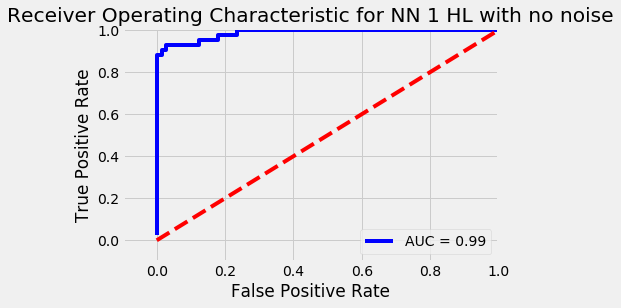

In [72]:
fpr, tpr, thresholds = roc_curve(y_test.ravel(),probs_nn.ravel())
roc_auc=(auc(fpr,tpr))
plt.title('Receiver Operating Characteristic for NN 1 HL with no noise')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 4.1.2 Neural Network with 1HL and with 30% average noise

In [73]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=0)

In [74]:
yz, fd = injectLabelNoise(y_train.ravel(),[0.7,0.3])

In [75]:
yz=castLabel(yz,0)

In [76]:
yz=pd.DataFrame(yz,columns=['target'],dtype='int')

In [77]:
nn = NN_1HL()

In [78]:
nn.fit(x_train, yz.values.ravel())

In [79]:
accuracy_score(y_test, nn.predict(x_test))

0.36842105263157893

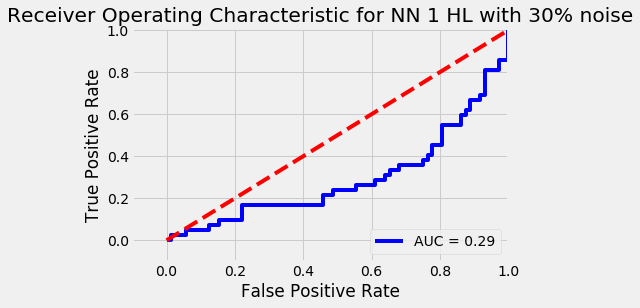

In [80]:
probs_nn=nn.predict_proba(x_test)
probs_nn=probs_nn.T
probs_nn=probs_nn[:,1]
fpr, tpr, thresholds = roc_curve(y_test.ravel(),probs_nn.ravel())
roc_auc=(auc(fpr,tpr))
plt.title('Receiver Operating Characteristic for NN 1 HL with 30% noise')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 4.2 MultiLayer Perceptrons

In [24]:
# Imports
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
np.random.seed(42)

Using TensorFlow backend.


In [25]:
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten
import keras.optimizers as opt
import keras.backend as K
import keras.callbacks

In [26]:
class LossHistory(keras.callbacks.Callback):
    """
    This class records the history of training.
    """
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

In [122]:
def build_model_architecture(input_sample=None, target=None, input_dim=1000, num_batch=50, classes=1, act_func_el='relu',act_func_last='sigmoid'):
    
    # loss history
    hist=LossHistory()
    
    # number of neurons in each layer
    
    l1_num_neuron=300
    l2_num_neuron=200
    l3_num_neuron=100
    l4_num_neuron=50
    l5_num_neuron=5
    output_neuron=classes
    
    # define dense layers with activation functions
    layer_1 = Dense(l1_num_neuron, activation=act_func_el,
                    kernel_regularizer='l2', input_dim=input_dim)
    layer_2 = Dense(l2_num_neuron, activation=act_func_el,
                    kernel_regularizer='l2')
    layer_3 = Dense(l3_num_neuron, activation=act_func_el,
                    kernel_regularizer='l2')
    layer_4 = Dense(l4_num_neuron, activation=act_func_el,
                    kernel_regularizer='l2')
    layer_5 = Dense(l5_num_neuron, activation=act_func_el,
                    kernel_regularizer='l2')
    layer_out = Dense(output_neuron, activation=act_func_last,
                    kernel_regularizer='l2')
    
    # define MLP
    
    mlp=Sequential()
    mlp.add(layer_1)
    mlp.add(Dropout(0.5))
    mlp.add(layer_2)
    mlp.add(Dropout(0.5))
    mlp.add(layer_3)
    #mlp.add(Dropout(0.4))
    #mlp.add(layer_4)
    #mlp.add(Dropout(0.2))
    #mlp.add(layer_5)
    mlp.add(layer_out)
    
    # define optimizer (optional)
    opts = opt.SGD(lr=0.001, momentum=0.9, decay=1e-6,nesterov=True)
    mlp.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    def get_loss(y_true, y_pred, regularization=0.1):
        return K.mean(K.square(y_true - y_pred)) + regularization * additional_fea
    
    mlp.fit(input_sample, target, batch_size=num_batch,epochs=5, verbose=2, callbacks=[hist], validation_split=0.3)
    
    return mlp,hist

In [28]:
num_classes = 2
yz = keras.utils.to_categorical(yz.values.ravel(), num_classes)

NameError: name 'yz' is not defined

In [110]:
yz.shape

(455, 2)

In [111]:
nn, nn_hist = build_model_architecture(input_sample=x_train,target=yz,input_dim=x_train.shape[1],num_batch=25,classes=2,act_func_el='relu',act_func_last='sigmoid')

Train on 318 samples, validate on 137 samples
Epoch 1/10
 - 1s - loss: 1.7985 - acc: 0.5126 - val_loss: 1.7297 - val_acc: 0.5912
Epoch 2/10
 - 0s - loss: 1.6820 - acc: 0.4654 - val_loss: 1.6242 - val_acc: 0.6277
Epoch 3/10
 - 0s - loss: 1.5851 - acc: 0.4906 - val_loss: 1.5288 - val_acc: 0.5985
Epoch 4/10
 - 0s - loss: 1.4879 - acc: 0.5566 - val_loss: 1.4423 - val_acc: 0.5620
Epoch 5/10
 - 0s - loss: 1.4077 - acc: 0.5189 - val_loss: 1.3644 - val_acc: 0.5401
Epoch 6/10
 - 0s - loss: 1.3283 - acc: 0.5723 - val_loss: 1.2942 - val_acc: 0.5109
Epoch 7/10
 - 0s - loss: 1.2616 - acc: 0.5409 - val_loss: 1.2306 - val_acc: 0.5109
Epoch 8/10
 - 0s - loss: 1.2022 - acc: 0.5346 - val_loss: 1.1726 - val_acc: 0.5109
Epoch 9/10
 - 0s - loss: 1.1451 - acc: 0.5346 - val_loss: 1.1206 - val_acc: 0.5109
Epoch 10/10
 - 0s - loss: 1.0909 - acc: 0.5786 - val_loss: 1.0744 - val_acc: 0.5182


In [116]:
predicted_values = nn.predict(x_test, verbose=1)

114/114 [==============================] - 0s 158us/step


In [117]:
predicted_values=predicted_values[:,0]

In [91]:
#predicted_dnn=np.max(predicted_values,axis=1)

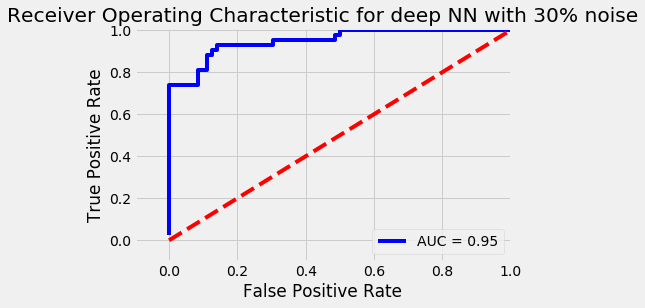

In [118]:
fpr, tpr, thresholds = roc_curve(y_test.ravel(),predicted_values.ravel())
roc_auc=(auc(fpr,tpr))
plt.title('Receiver Operating Characteristic for deep NN with 30% noise')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 5. Using XGBoost

In [186]:
from xgboost import XGBClassifier

In [187]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=0)

In [188]:
xgb=XGBClassifier(n_estimators=1000,max_depth=3,objective='binary:logistic',nthread=-1)

In [189]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [190]:
pred_xgb=xgb.predict(x_test)

In [191]:
accuracy_score(y_test, pred_xgb)

0.92397660818713445

In [192]:
pred_probs_xgb=xgb.predict_proba(x_test)[:, 1]

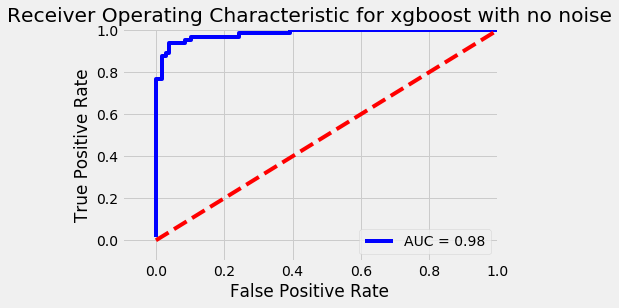

In [193]:
fpr, tpr, thresholds = roc_curve(y_test.ravel(),pred_probs_xgb.ravel())
roc_auc=(auc(fpr,tpr))
plt.title('Receiver Operating Characteristic for xgboost with no noise')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [194]:
yz, fd = injectLabelNoise(y_train.ravel(),[0.7,0.3])

In [195]:
xgb.fit(x_train,yz)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [196]:
pred_xgb_noise=xgb.predict(x_test)

In [197]:
accuracy_score(y_test, pred_xgb_noise)

0.19883040935672514

In [198]:
pred_probs_xgb_noise=xgb.predict_proba(x_test)[:, 1]

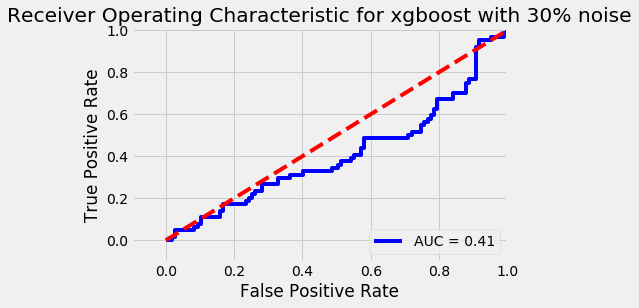

In [199]:
fpr, tpr, thresholds = roc_curve(y_test.ravel(),pred_probs_xgb_noise.ravel())
roc_auc=(auc(fpr,tpr))
plt.title('Receiver Operating Characteristic for xgboost with 30% noise')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 6. Implementing on the Credit Card DataSet

In [3]:
cc_data=pd.read_csv('creditcard.csv')

In [4]:
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
print('The size of the dataset: ',cc_data.shape)

The size of the dataset:  (284807, 31)


In [6]:
cc_data.drop('Time',axis=1,inplace=True)

In [7]:
cc_data['Class']=cc_data['Class'].map({1:'Fradulent',0:'Normal'})

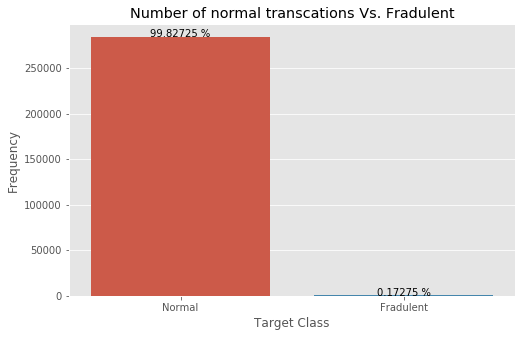

In [11]:
import matplotlib.style as style
style.use('ggplot')
plt.figure(figsize=(8,5))
ax=sns.countplot(x='Class',data=cc_data)
total = float(len(cc_data))
plt.title('Number of normal transcations Vs. Fradulent')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 4,'{:1.5f} %'.format(height*100/total),ha="center") 

In [242]:
cc_data['Class']=cc_data['Class'].map({'Fradulent':1,'Normal':0})

## 6.1. Standardizing the Data Set

In [243]:
X=cc_data.drop('Class',axis=1)
Y=cc_data[['Class']]

In [244]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.25,stratify=Y.Class)

In [245]:
from sklearn.preprocessing import StandardScaler
X_train['Amount']=StandardScaler().fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['Amount']=StandardScaler().fit_transform(X_test['Amount'].values.reshape(-1,1))

In [246]:
# Number of data points in the minority class
number_records_fraud = len(cc_data[cc_data.Class == 1])
fraud_indices = np.array(cc_data[cc_data.Class == 1].index)
print("The number of fraudulent records in total data set: ",number_records_fraud)
print("Percentage of fraudulent records in total data: "+str(number_records_fraud*100/len(cc_data))+"%")

The number of fraudulent records in total data set:  492
Percentage of fraudulent records in total data: 0.1727485630620034%


In [247]:
Y_train.head()

,Class
52579,0
104750,0
138946,0
254495,0
251981,0


## 6.2.1. Using Logistic Regression with 70% N and 30% P fliprate

In [248]:
from sklearn.linear_model import LogisticRegression

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2017,shuffle=True)
X_train['Amount']=StandardScaler().fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['Amount']=StandardScaler().fit_transform(X_test['Amount'].values.reshape(-1,1))
n_train_data,dim=X_train.shape
n_test_data,dim_test=X_test.shape
#X_train=addbias(X_train)
#X_test=addbias(X_test)
Y_train=Y_train.values.reshape(n_train_data,1)
Y_test=Y_test.values.reshape(n_test_data,1)

In [255]:
clf=LogisticRegression()
clf.fit(X_train, Y_train)
pred_lg=clf.predict(X_test)
pred_probs=clf.predict_proba(X_test)

In [257]:
pred_probs=pred_probs[:,1]

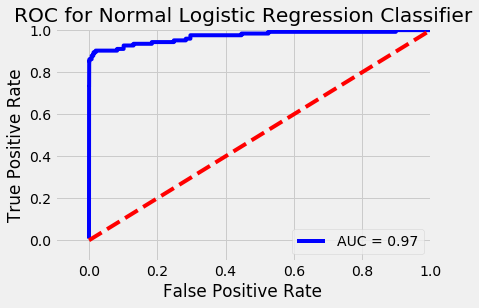

In [259]:
fpr, tpr, thresholds = roc_curve(Y_test.values.ravel(),pred_probs.ravel())
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.title('ROC for Normal Logistic Regression Classifier')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [268]:
Y_train=Y_train.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [343]:
yz, fd = injectLabelNoise(Y_train,[[0.7,0.3],[0.3,0.7]])

In [317]:
clf=LogisticRegression()
clf.fit(X_train, yz)
pred_lg=clf.predict(X_test)
pred_probs=clf.predict_proba(X_test)

In [318]:
pred_probs=pred_probs[:,1]

In [319]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

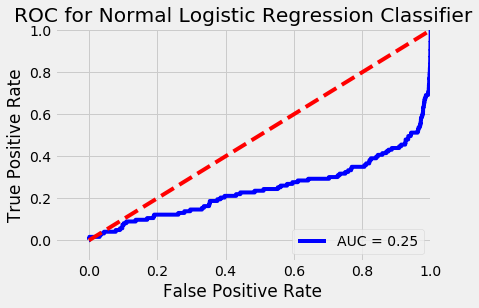

In [320]:
fpr, tpr, thresholds = roc_curve(Y_test.values.ravel(),pred_probs.ravel())
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.title('ROC for Normal Logistic Regression Classifier')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [321]:
Y_train_orig=pd.DataFrame(Y_train,columns=['before_noise'])

In [322]:
Y_train_orig['before_noise'].value_counts()

0    213236
1       369
Name: before_noise, dtype: int64

In [323]:
Y_train_orig['before_noise']=Y_train_orig['before_noise'].map({1:'Fraudulent',0:'Normal'})

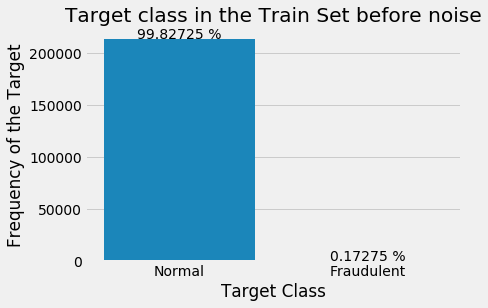

In [324]:
#import matplotlib.style as style
#style.use('fivethirtyeight')
ax=sns.countplot(x="before_noise", data=Y_train_orig,order=['Normal','Fraudulent']);
total=float(len(Y_train_orig))
plt.title('Target class in the Train Set before noise')
plt.ylabel('Frequency of the Target')
plt.xlabel('Target Class')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.5f} %'.format(height*100/total),ha="center")
    #ax.text(p.get_x()+p.get_width()/2.,height - 35,'{:1.5f} '.format(height),ha="center") 

In [332]:
Y_test_orig=pd.DataFrame(Y_test.values,columns=['before_noise'])

In [333]:
Y_test_orig['before_noise']=Y_test_orig['before_noise'].map({1:'Fraudulent',0:'Normal'})

In [334]:
Y_test_orig.head()###

,before_noise
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal


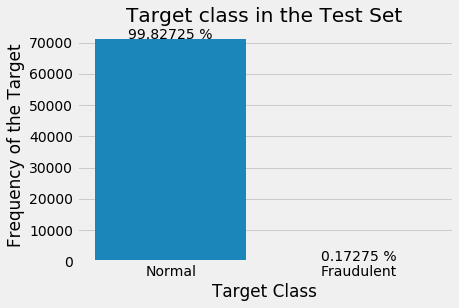

In [335]:
ax=sns.countplot(x="before_noise", data=Y_test_orig,order=['Normal','Fraudulent']);
total=float(len(Y_test_orig))
plt.title('Target class in the Test Set')
plt.ylabel('Frequency of the Target')
plt.xlabel('Target Class')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 2,'{:1.5f} %'.format(height*100/total),ha="center")
    #ax.text(p.get_x()+p.get_width()/2.,height - 10,'{:1.5f} '.format(height),ha="center") 

In [344]:
yz=castLabel(yz,0)

In [345]:
Y_train_noise=pd.DataFrame(yz,columns=['after_noise'])

In [346]:
Y_train_noise['after_noise'].value_counts()

1.0    149411
0.0     64194
Name: after_noise, dtype: int64

In [347]:
Y_train_noise['after_noise']=Y_train_noise['after_noise'].map({1:'Fraudulent',0:'Normal'})

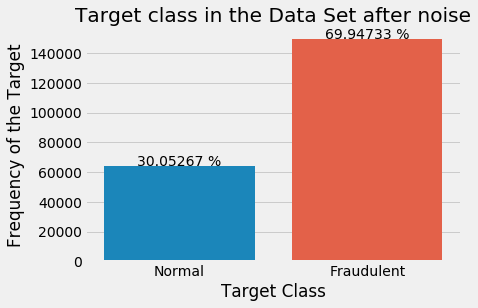

In [348]:
ax=sns.countplot(x="after_noise", data=Y_train_noise,order=['Normal','Fraudulent']);
total=float(len(Y_train_noise))
plt.title('Target class in the Data Set after noise')
plt.ylabel('Frequency of the Target')
plt.xlabel('Target Class')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.5f} %'.format(height*100/total),ha="center")

## 6.2.2. Using NAR model: Robust Logistic Regression

In [219]:
err_rlr=[]
w_iter=[]

for i in range(5):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=2017,shuffle=True)
    X_train['Amount']=StandardScaler().fit_transform(X_train['Amount'].values.reshape(-1,1))
    X_test['Amount']=StandardScaler().fit_transform(X_test['Amount'].values.reshape(-1,1))
    n_train_data,dim=X_train.shape
    n_test_data,dim_test=X_test.shape
    X_train=addbias(X_train)
    X_test=addbias(X_test)
    Y_train=Y_train.values.reshape(n_train_data,1)
    Y_test=Y_test.values.reshape(n_test_data,1)
    n_train_data,dim=X_train.shape
    n_test_data,dim_test=X_test.shape
    winit = np.random.rand(dim,1)

    yz, fd = injectLabelNoise(Y_train,[0.7,0.3])
    gamma=np.array([[0.7,0.3],[0.3,0.7]])
    w, g, llh = rlr(np.random.randn(dim,1)*0.1, gamma, X_train, yz, regType="lasso")
    w=w.reshape(dim,1)
    err_rlr.append(np.sum(np.sign(np.dot(X_test,w))!=castLabel(Y_test,-1))/len(Y_test))
    print(err_rlr[i])
    w_iter.append(w)
    w_final=w_iter[np.argmin(err_rlr)]
print('The final error: ',sum(err_rlr)/5)

0.503398780933
0.398696665824
0.365411083958
0.548032358642
0.503398780933
The final error:  0.463787534058


In [220]:
accuracy_score(castLabel(Y_test,-1), np.sign(np.dot(X_test,w_final)))

0.63458891604168421

In [221]:
Y_test=castLabel(Y_test,0)

In [222]:
probs=sigmoid(np.dot(X_test,w_final))

In [223]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [224]:
fpr, tpr, thresholds = roc_curve(Y_test.ravel(),probs.ravel())
roc_auc = auc(fpr,tpr)

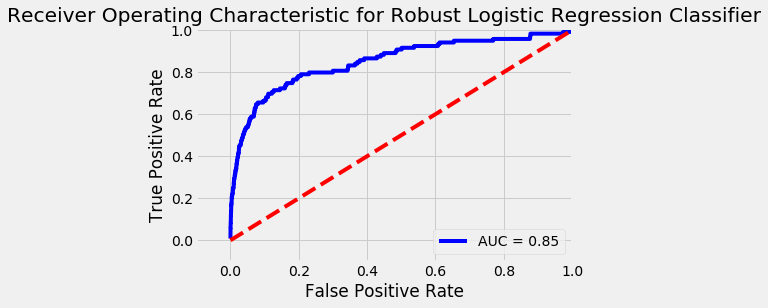

In [225]:
# Plot ROC
plt.title('Receiver Operating Characteristic for Robust Logistic Regression Classifier')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Time taken by Robust LR for the credit card dataset: 2 hrs approximately

## 6.3. Using NCAR model: Generalized Robust Logistic Regression Model

In [59]:
err_glr=[]
w_iter=[]
for i in range(11):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2017,shuffle=True)
    X_train['Amount']=StandardScaler().fit_transform(X_train['Amount'].values.reshape(-1,1))
    X_test['Amount']=StandardScaler().fit_transform(X_test['Amount'].values.reshape(-1,1))
    n_train_data,dim=X_train.shape
    n_test_data,dim_test=X_test.shape
    
    X_train=addbias(X_train)
    X_test=addbias(X_test)
    Y_train=Y_train.values.reshape(n_train_data,1)
    Y_test=Y_test.values.reshape(n_test_data,1)
    
    n_train_data,dim=X_train.shape
    n_test_data,dim_test=X_test.shape
    
    winit = np.random.rand(dim,1)
    yz, fd = injectLabelNoise(Y_train,[0.7,0.3])
    wg, t0, t1, llhg = glr(np.random.randn(dim,1)*0.1,X_train, yz, regType="lasso")
    wg=wg.reshape(wg.shape[0],1)
    err_glr.append(np.sum(np.sign(np.dot(X_test,wg))!=castLabel(Y_test,-1))/len(Y_test))
    w_iter.append(wg)
    print(err_glr[i])
    w_iter.append(wg)
    #w_final=w_iter[np.argmin(err_glr)]
print('The final error: ',sum(err_glr)/11)

0.452547312243
0.71078964924
0.489905551069
0.562357361048
0.596257153892
0.431901969734
0.370071275587
0.627225167656
0.55426424634
0.442452863312
0.625926055967
The final error:  0.533063509644


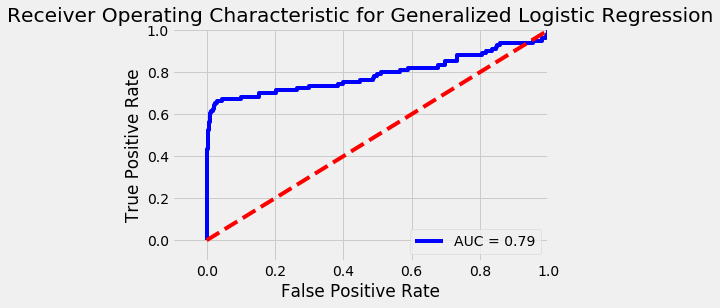

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [60]:
rocauc=[]
for j in range(len(w_iter)):
    w_final=w_iter[j]
    probs_glr=sigmoid(np.dot(X_test,w_final))
    Y_test=castLabel(Y_test,0)
    fpr, tpr, thresholds = roc_curve(Y_test.ravel(),probs_glr.ravel())
    rocauc.append(auc(fpr,tpr))
w_final=w_iter[np.argmax(rocauc)]
probs_glr=sigmoid(np.dot(X_test,w_final))
Y_test=castLabel(Y_test,0)
fpr, tpr, thresholds = roc_curve(Y_test.ravel(),probs_glr.ravel())
roc_auc=(auc(fpr,tpr))
plt.title('Receiver Operating Characteristic for Generalized Logistic Regression')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Time taken to solve :

## 6.4. Using deep NN

In [199]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=2017,shuffle=True,stratify=Y.Class)
#X_train=StandardScaler().fit_transform(X_train)
#X_test=StandardScaler().fit_transform(X_test)
X_train['Amount']=StandardScaler().fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['Amount']=StandardScaler().fit_transform(X_test['Amount'].values.reshape(-1,1))
n_train_data,dim=X_train.shape
n_test_data,dim_test=X_test.shape
#X_train=addbias(X_train)
#X_test=addbias(X_test)
Y_train=Y_train.values.reshape(n_train_data,1)
Y_test=Y_test.values.reshape(n_test_data,1)
#n_train_data,dim=X_train.shape
#n_test_data,dim_test=X_test.shape
#winit = np.random.rand(dim,1)

yz, fd = injectLabelNoise(Y_train,[0.7,0.3])

In [48]:
# injecting noise
yz, fd = injectLabelNoise(Y_train.values.ravel(),[0.3,0.7])

MemoryError: 

In [200]:
yz=castLabel(yz,0)

In [201]:
y_noise=pd.DataFrame(yz,columns=['target'])

In [202]:
y_noise['target'].value_counts()

1.0    150002
0.0     63603
Name: target, dtype: int64

In [203]:
num_classes = 2
y_noised = keras.utils.to_categorical(y_noise.values.ravel(), num_classes)

In [204]:
y_noised.shape

(213605, 2)

In [205]:
X_train.shape

(213605, 29)

In [206]:
nn, nn_hist = build_model_architecture(input_sample=X_train.values,target=y_noised,input_dim=X_train.shape[1],num_batch=500,classes=2,act_func_el='relu',act_func_last='sigmoid')

Train on 149523 samples, validate on 64082 samples
Epoch 1/5
 - 6s - loss: 1.1909 - acc: 0.6996 - val_loss: 0.6156 - val_acc: 0.7045
Epoch 2/5
 - 5s - loss: 0.6145 - acc: 0.7013 - val_loss: 0.6099 - val_acc: 0.7045
Epoch 3/5
 - 5s - loss: 0.6120 - acc: 0.7013 - val_loss: 0.6087 - val_acc: 0.7045
Epoch 4/5
 - 5s - loss: 0.6113 - acc: 0.7013 - val_loss: 0.6084 - val_acc: 0.7045
Epoch 5/5
 - 5s - loss: 0.6110 - acc: 0.7013 - val_loss: 0.6092 - val_acc: 0.7045


In [207]:
predicted_values = nn.predict(X_test.values, verbose=1)

71202/71202 [==============================] - 3s 46us/step


In [209]:
predicted_values=predicted_values[:,1]

In [208]:
predicted_values

array([[ 0.3211033 ,  0.67800802],
       [ 0.3211033 ,  0.67800802],
       [ 0.3211033 ,  0.67800802],
       ..., 
       [ 0.3211033 ,  0.67800802],
       [ 0.3211033 ,  0.67800802],
       [ 0.3211033 ,  0.67800802]], dtype=float32)

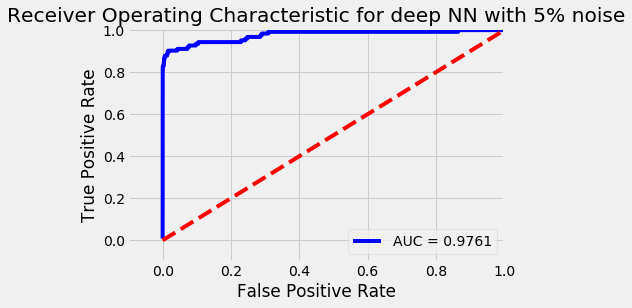

In [167]:
fpr, tpr, thresholds = roc_curve(Y_test.ravel(),predicted_values.ravel())
roc_auc=(auc(fpr,tpr))
plt.title('Receiver Operating Characteristic for deep NN with 5% P and 5% N fliprate')
plt.plot(fpr, tpr, 'b',label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

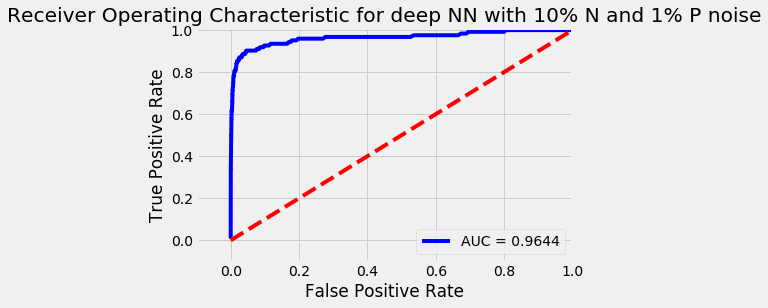

In [193]:
fpr, tpr, thresholds = roc_curve(Y_test.ravel(),predicted_values.ravel())
roc_auc=(auc(fpr,tpr))
plt.title('Receiver Operating Characteristic for deep NN with 10% N and 1% P fliprate')
plt.plot(fpr, tpr, 'b',label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

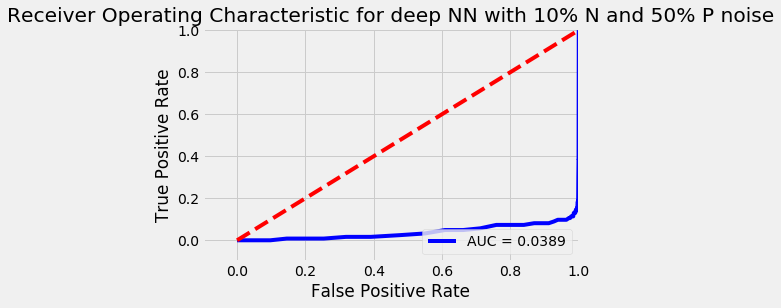

In [198]:
fpr, tpr, thresholds = roc_curve(Y_test.ravel(),predicted_values.ravel())
roc_auc=(auc(fpr,tpr))
plt.title('Receiver Operating Characteristic for deep NN with 10% N and 50% P fliprate')
plt.plot(fpr, tpr, 'b',label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

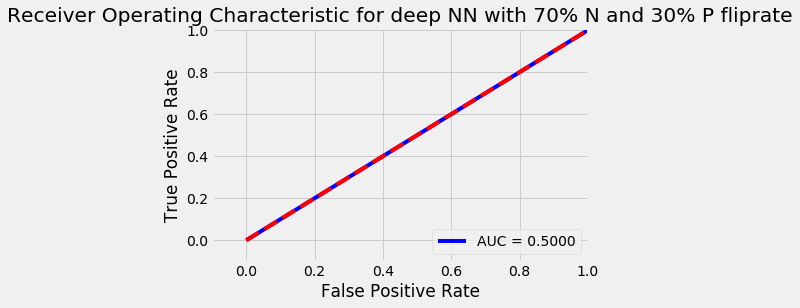

In [211]:
fpr, tpr, thresholds = roc_curve(Y_test.ravel(),predicted_values.ravel())
roc_auc=(auc(fpr,tpr))
plt.title('Receiver Operating Characteristic for deep NN with 70% N and 30% P fliprate')
plt.plot(fpr, tpr, 'b',label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()